In [1]:
#	№    For copying
import os
import pandas as pd
import seaborn as sns
import geopandas as gpd
from random import randint
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from draw import Histogram, Piechart, Map, StackedBar
from helper import CountryHelper,JobHelper, SexHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
dataset = "Media Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

# dfs = {}
# for case_study in case_studies:
#     these_dfs = {
#         model:pd.read_excel(
#             os.path.join("Case Studies",case_study,f"{case_study}.xlsx"),
#             sheet_name=model,
#             nrows=51, #Header (1) + Data (50)
#             header=[1,2] if case_study in ['Career Development','Family Health'] else [1]
#         )
#         for model in models
#     }
    
#     for df in these_dfs.values():
#         df.columns = [
#             ' '.join(map(str,[    
#                 item for item in [(col,),col][type(col) is tuple] #Ensure col is a tuple
#                 if 'unnamed' not in str(item).lower() #Remove unnamed columns
#             ])).strip()
#             for col in df.columns
#         ]
#         df['Batch'] = df['Batch'].ffill().astype(int)
        
#     these_dfs = {df_i:df.drop(columns=[''], errors='ignore') for df_i,df in these_dfs.items()}
#     dfs[case_study] = these_dfs

# for case_study in dfs:
#     for model_df in dfs[case_study]:
#         dfs[case_study][model_df].to_csv(os.path.join("Case Studies",case_study,f"{model_df}.csv"),index=False)



data_folder = os.path.join('Case Studies', dataset, 'data')
if not os.path.exists(data_folder):
    os.makedirs(data_folder)


chizu = Map(models)
piechart = Piechart(models)
stackedBar = StackedBar(models)
histogram = Histogram(models)

sexHelper = SexHelper()
countryHelper = CountryHelper()
jobHelper = JobHelper()

## Media Literacy

### Country of Origin by Race (Map)

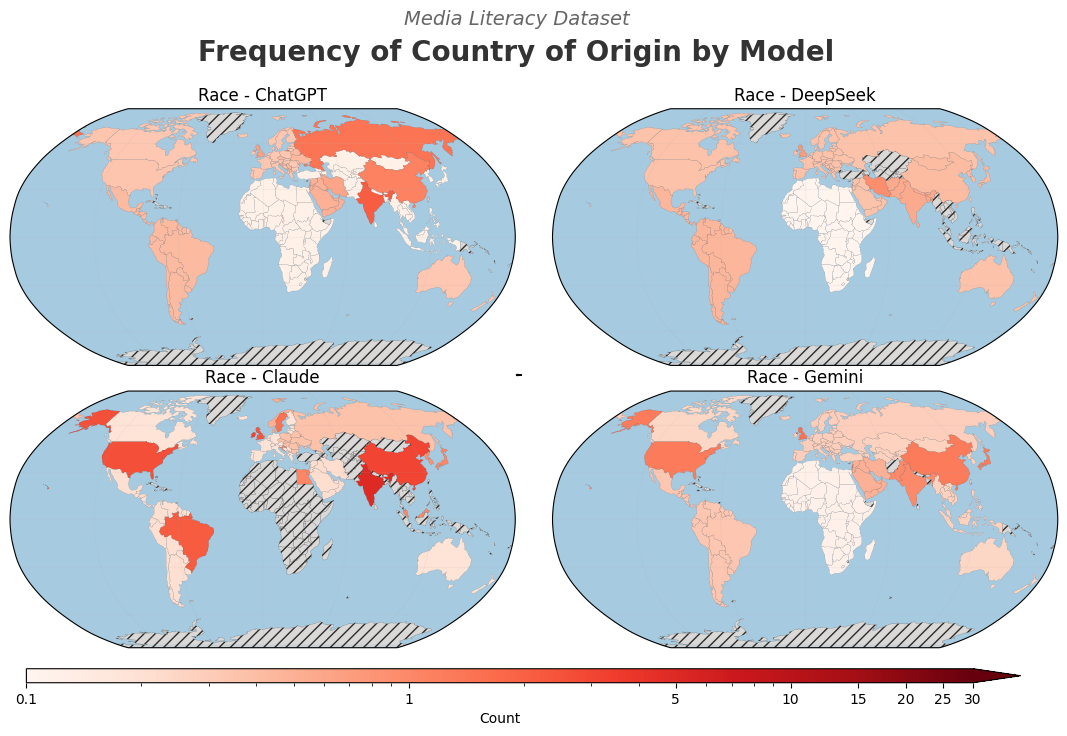

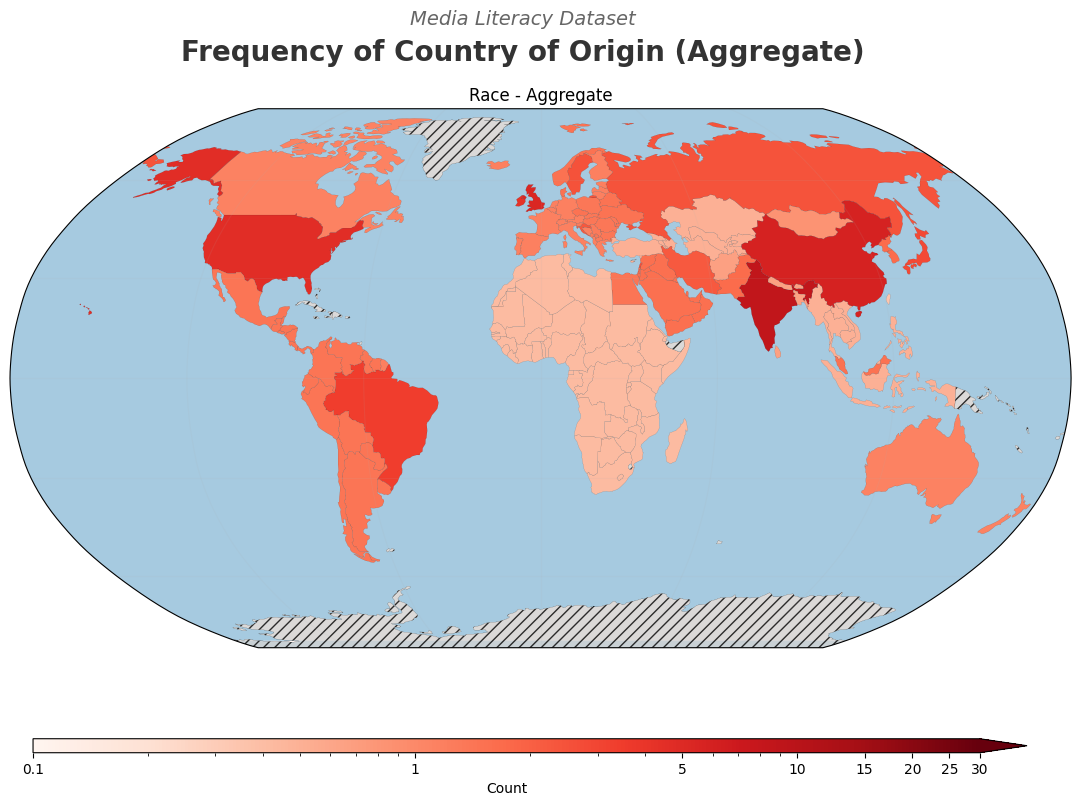

In [2]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Origin',
        title=f'Race - {model}',
        cmap='Reds', ax=axs[i%2][i//2],step=5,
        low_poly=True, log=True,
        max_count=30, legend=[0,0,share_legend,0][i],
    )
    
fig.suptitle('Frequency of Country of Origin by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country of Origin by Race (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Origin',
    title=f'Race - Aggregate',
    cmap='Reds', ax=ax, step=5,
    low_poly=True, log=True,
    max_count=30, legend=True,
    legend_loc=[0,-0.1,0,0]
)

fig.suptitle('Frequency of Country of Origin (Aggregate)', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')

plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country of Origin by Race (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Country of Origin by Race (Histogram)

c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:259: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([
c:\Users\Owner\Desktop\gender\draw.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


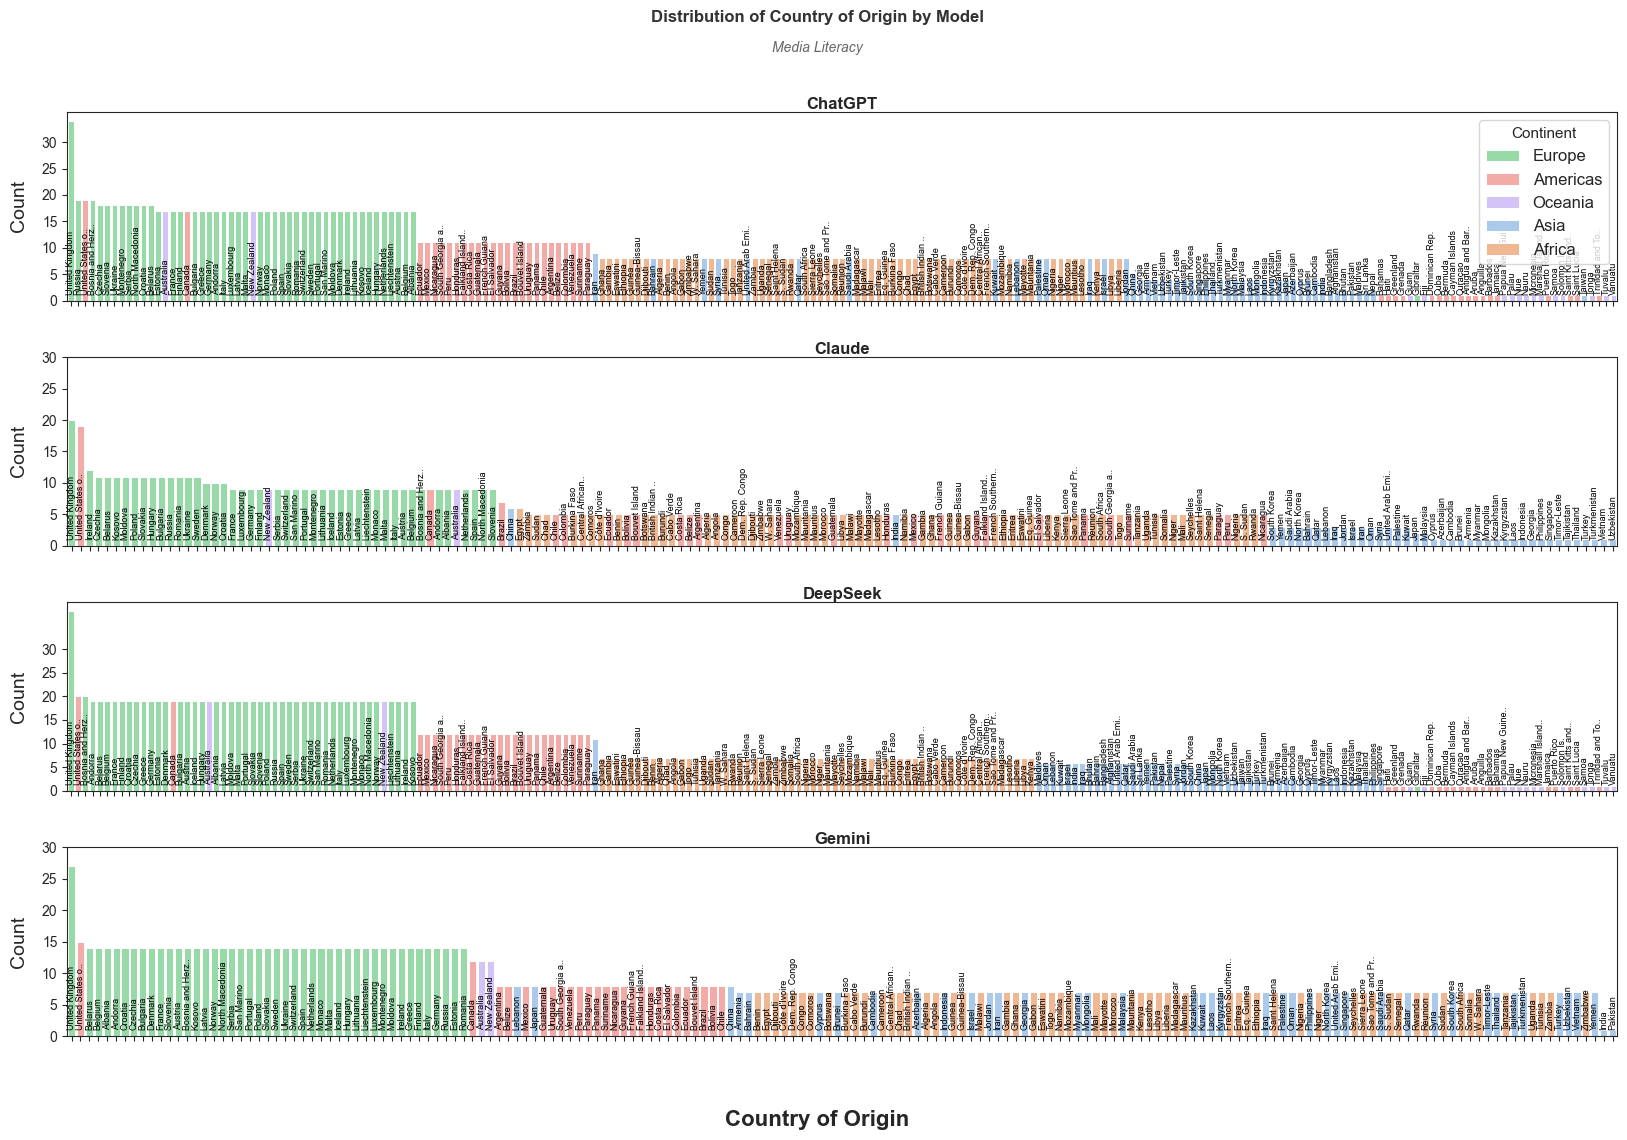

In [3]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Origin'] = df['Race']  \
    .apply(countryHelper.race2country) \
    .apply(countryHelper.fix_country_naming)

df = df[["Country of Origin",'model']]
df = df.explode('Country of Origin')
df['Region'] = df['Country of Origin'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Origin'].apply(
    lambda country: countryHelper.country2region(country)['region']
)

#TODO: If hue is continet/region, use a map instead of a legend to show the colors
plt = histogram.draw(
    df=df,x='Country of Origin',
    hue='Continent',
    dataset=dataset, ylim=30,ystep=5,
    aggregate=False,long_layout=True,
    xtick_label_max_len=15,
    figsize=(20,12)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country of Origin by Race (Histogram)"), dpi=300, bbox_inches='tight')
plt.show()

### Country of Residence (Map + Histogram)

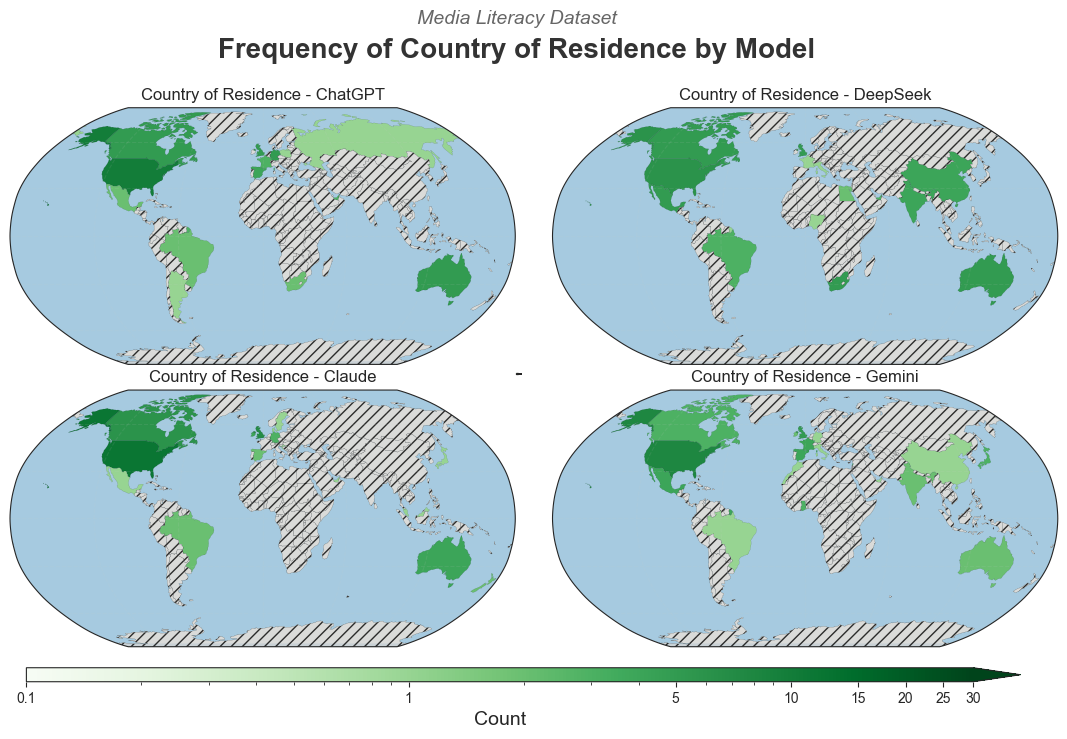

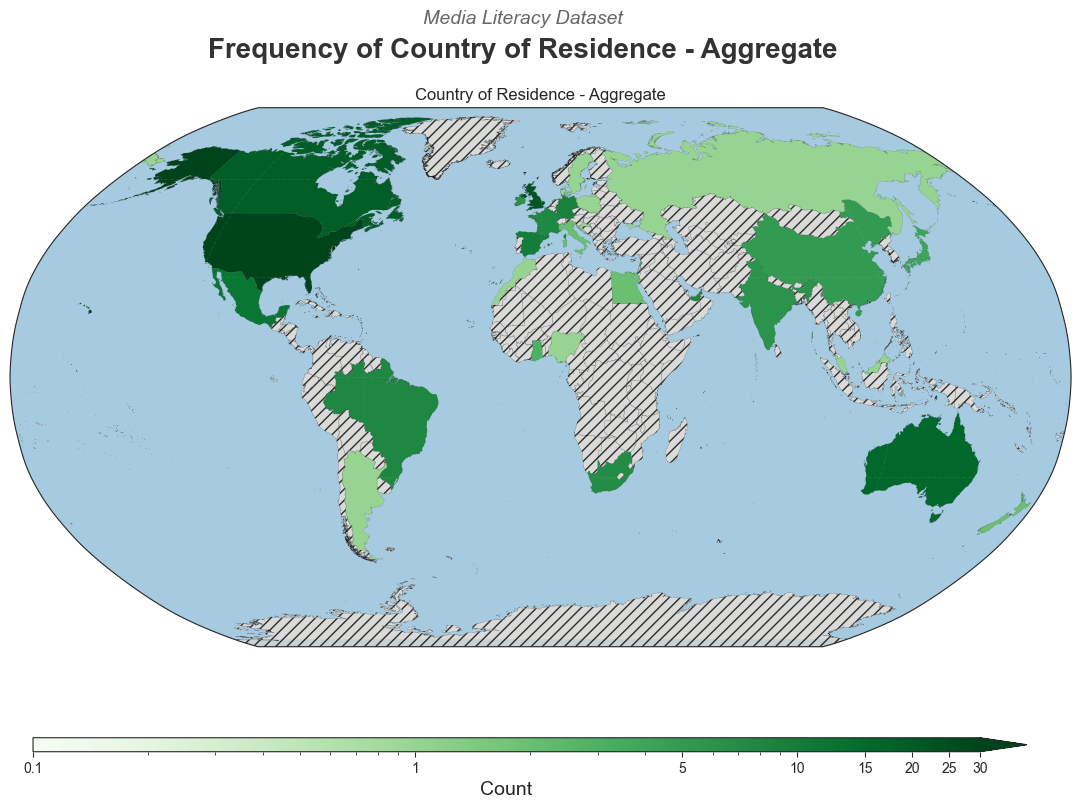

In [4]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Residence',
        title=f'Country of Residence - {model}',
        cmap='Greens', ax=axs[i%2][i//2],
        low_poly=True, log=True, step=5,
        max_count=30, legend=[0,0,share_legend,0][i],
    )

fig.suptitle('Frequency of Country of Residence by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country of Residence (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Residence',
    title=f'Country of Residence - Aggregate',
    cmap='Greens', ax=ax,step=5,
    low_poly=False, log=True,
    max_count=30, legend=True,
    legend_loc=[0,-0.1,0,0]
)
fig.suptitle('Frequency of Country of Residence - Aggregate', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country of Residence (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()


c:\Users\Owner\Desktop\gender\draw.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


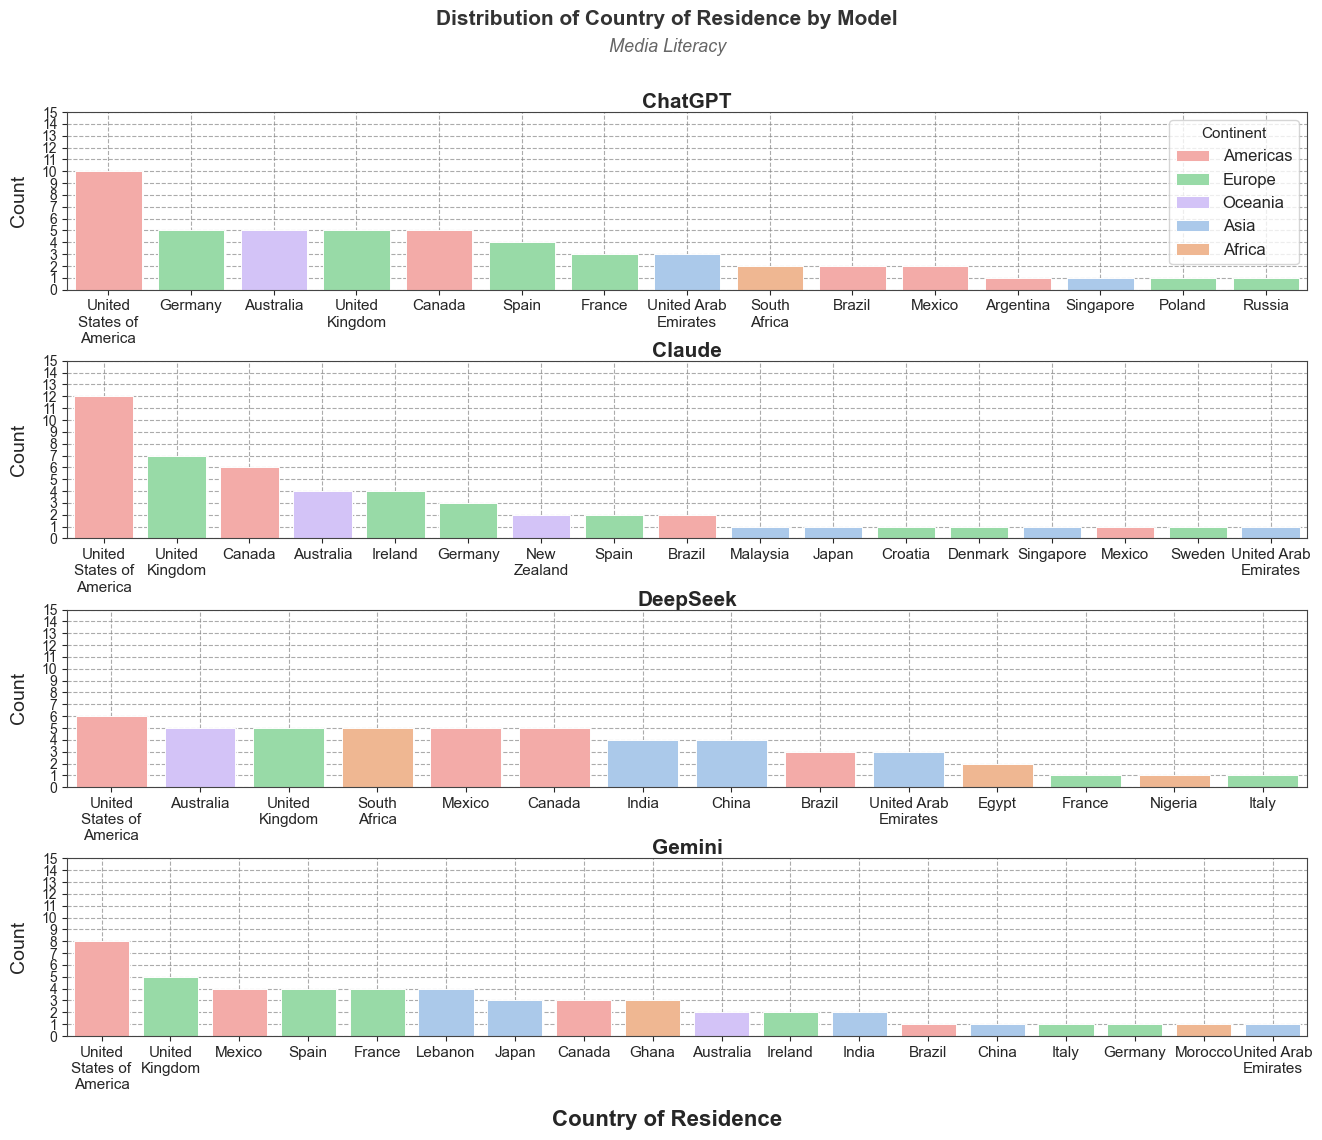

In [5]:
models=['ChatGPT','Claude','DeepSeek','Gemini']
countryHelper = CountryHelper()

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Region'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['region']
)

plt = histogram.draw(
    df=df,x='Country of Residence',
    hue='Continent', text_width=10,
    dataset=dataset, grid=True,
    aggregate=False,long_layout=True, title_size=15,
    figsize=(16,12), rotation=0,hspace=0.4
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country of Residence (Histogram)"), dpi=300, bbox_inches='tight')
plt.show()

### Country Ordering (Stacked)

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


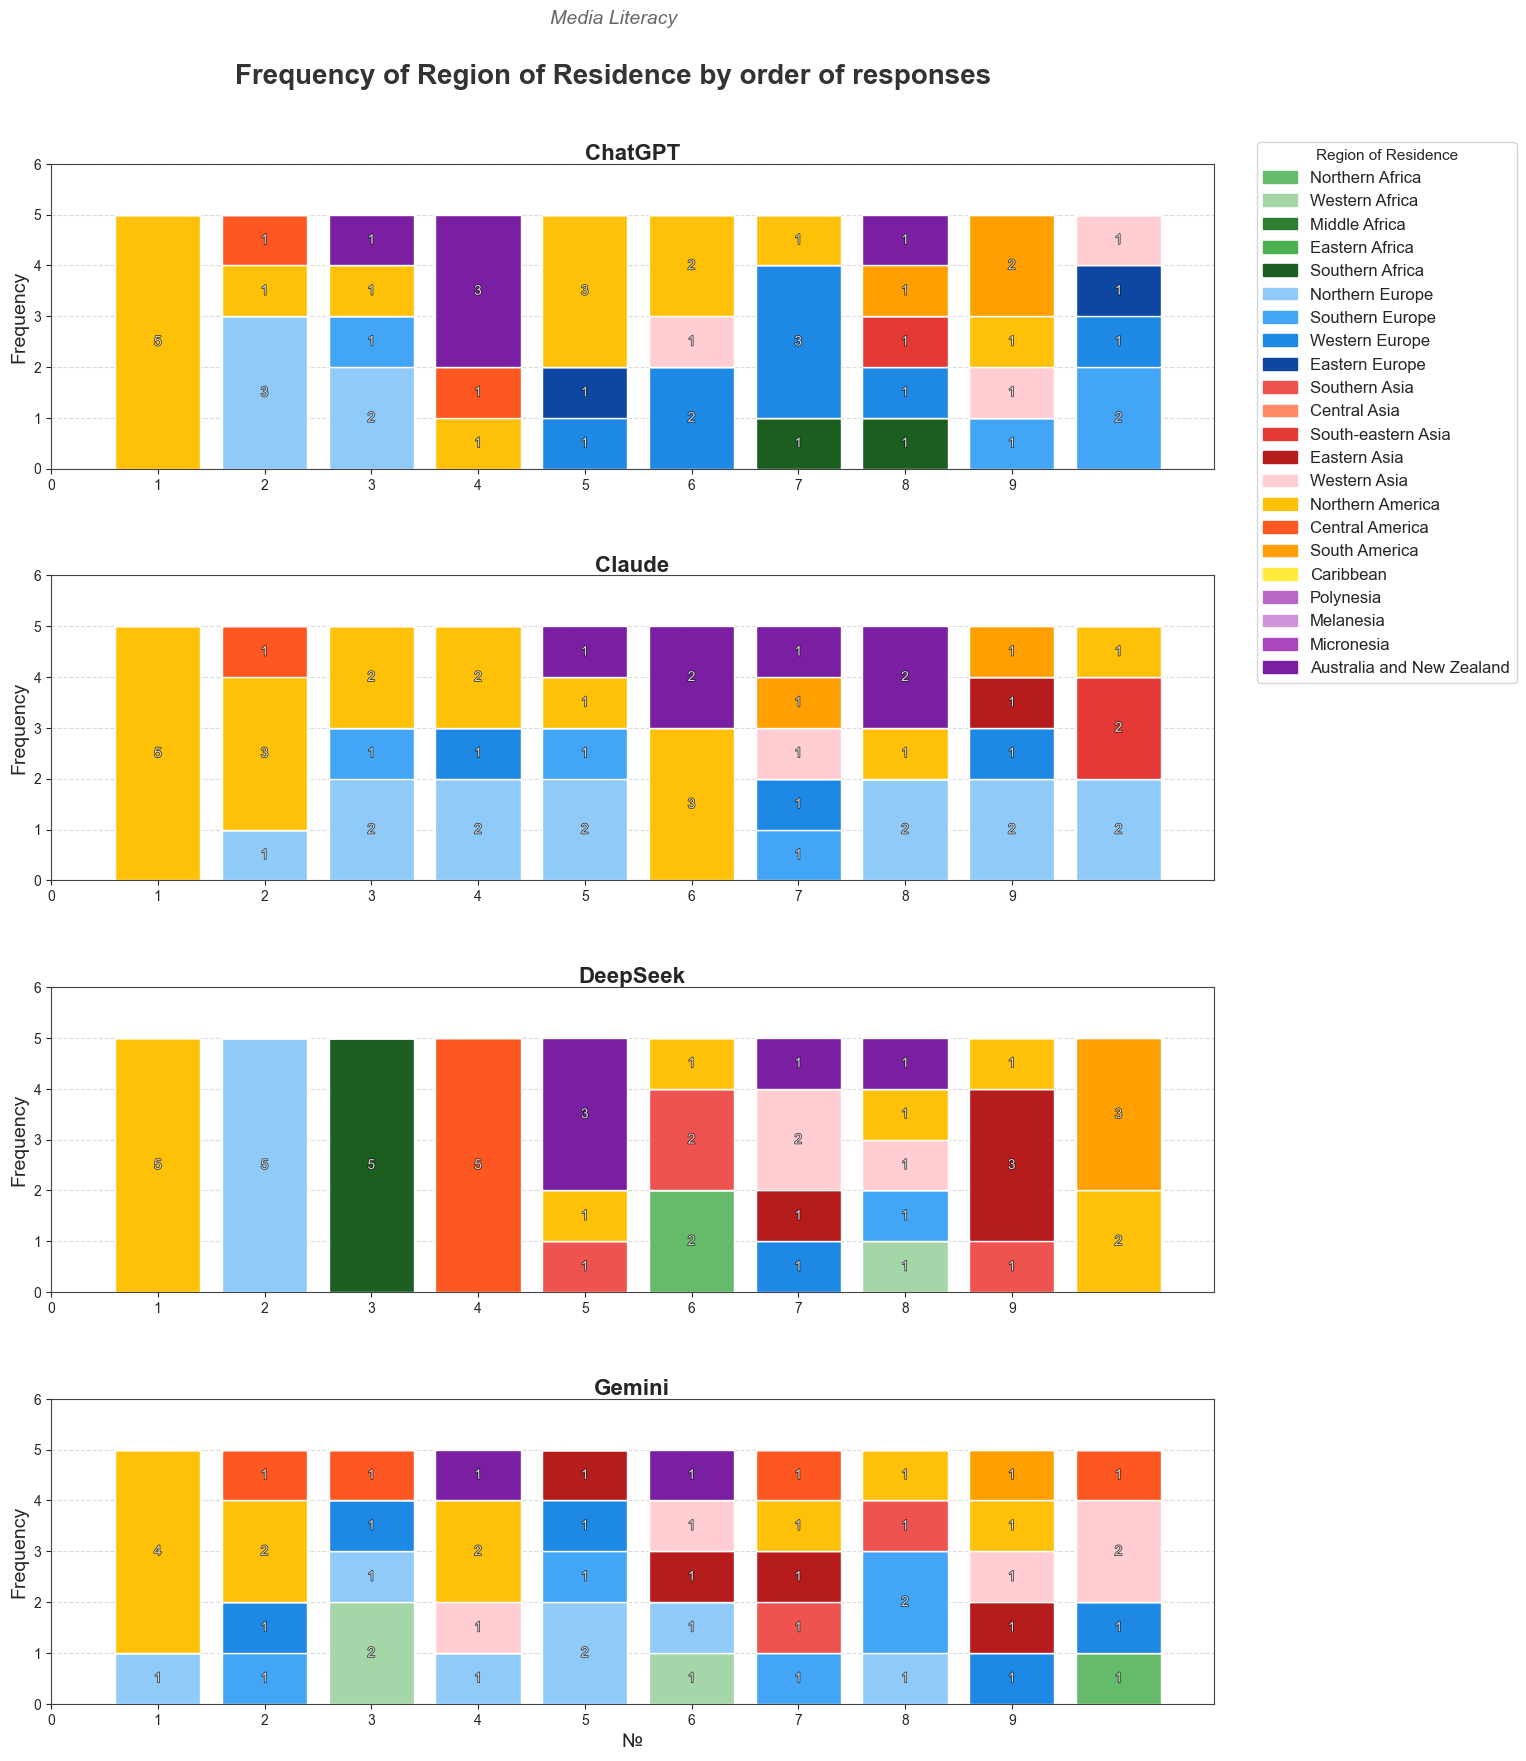

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


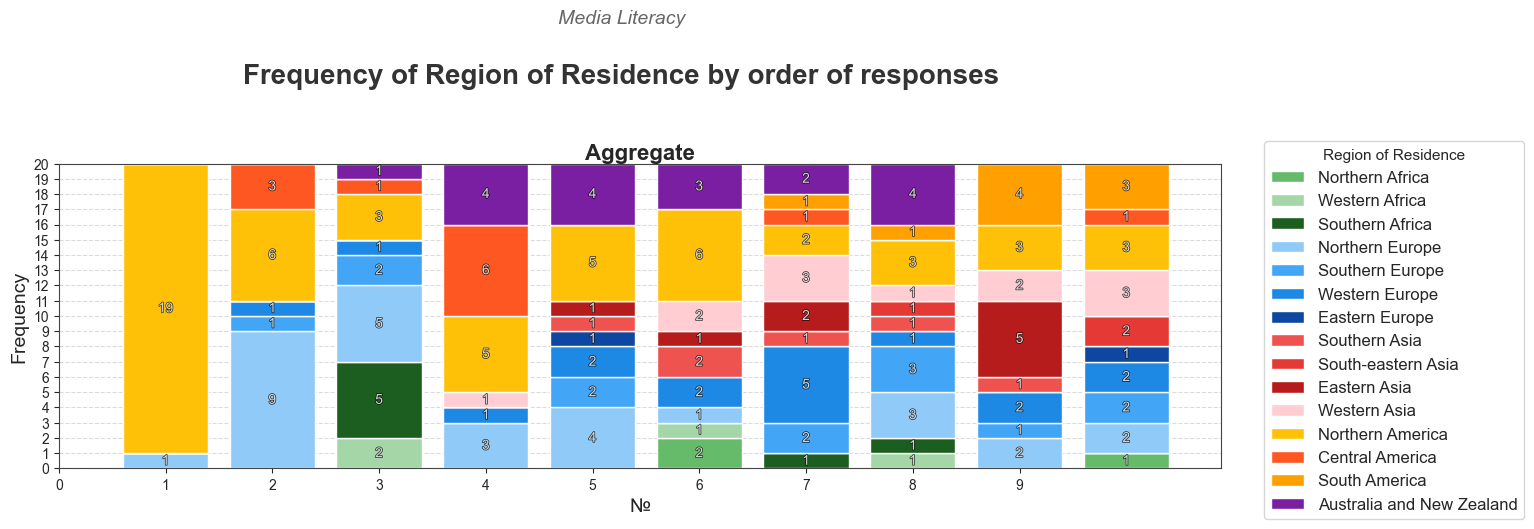

In [6]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Region of Residence'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['subregion']
)
df['Continent'] = df['Country of Residence'].apply(
    lambda country: countryHelper.country2region(country)['region']
)

plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Region of Residence',
    space=0.35, ylim=6, bar_labels=True, dataset=dataset,
    figsize=(15,20), grid=True, legend=True
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country Ordering (Stacked)"), dpi=300, bbox_inches='tight')
plt.show()

plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Region of Residence', aggregate=True,
    space=0.35, ylim=20, bar_labels=True, dataset=dataset,
    figsize=(15,20), grid=True, legend=True
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Country Ordering (Stacked) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age and Country of Residence

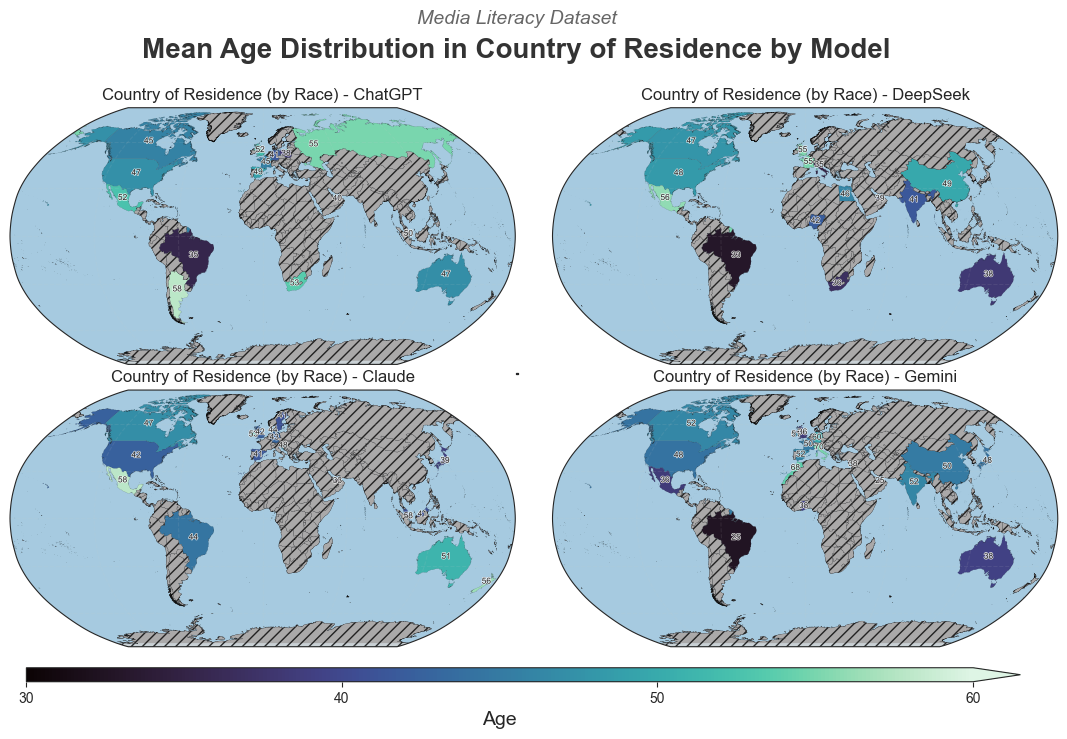

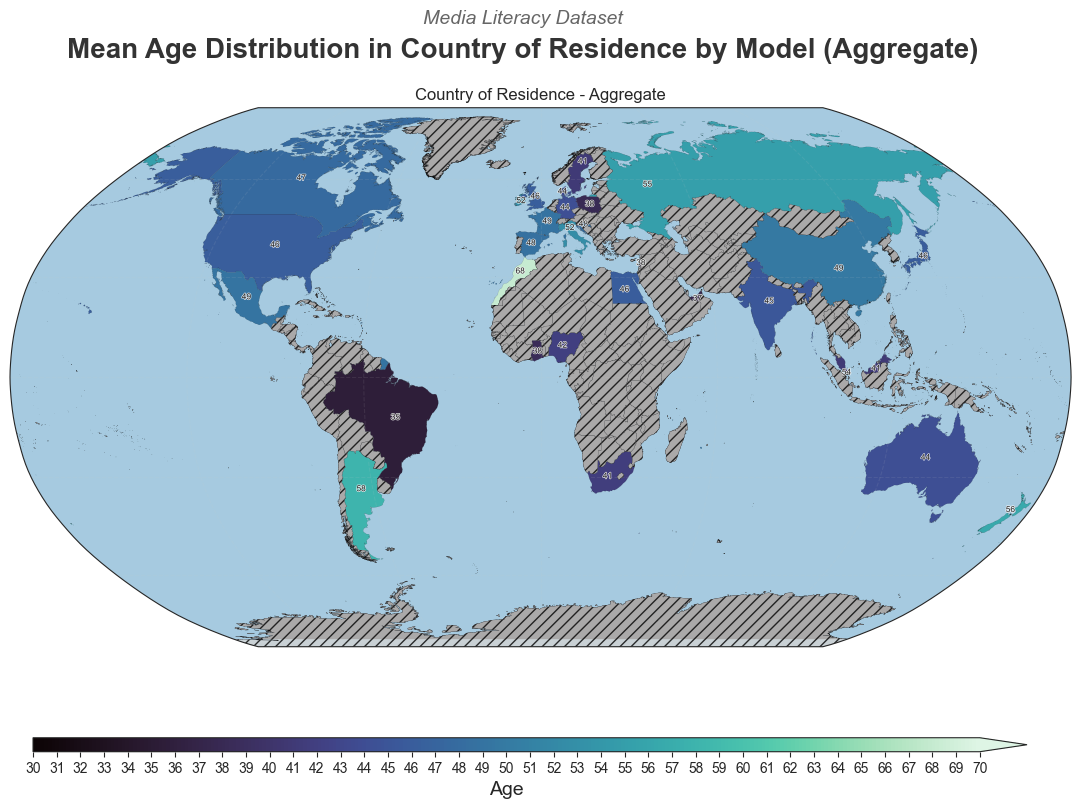

In [7]:
share_legend = True

fig, axs = plt.subplots(2, 2, figsize=(14, 7), squeeze=False,
                        subplot_kw={'projection': ccrs.Robinson()},
                        gridspec_kw={'wspace': 0, 'hspace': 0.1})

for i,model in enumerate(['ChatGPT','Claude','DeepSeek','Gemini']):

    df = dfs[dataset][model]
    df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
    df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)
    
    axs[i%2][i//2] = chizu.draw(
        df=df,x='Country of Residence', y='Age',
        title=f'Country of Residence (by Race) - {model}',
        cmap='mako', ax=axs[i%2][i//2], step=10,
        low_poly=False, log=False, show_labels=True,
        max_count=60, legend=[0,0,share_legend,0][i],
    )
    
fig.suptitle('Mean Age Distribution in Country of Residence by Model', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age and Country of Residence (Map)"), dpi=300, bbox_inches='tight')
plt.show()

df = pd.concat([dfs[dataset][model] for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ccrs.Robinson()})
ax = chizu.draw(
    df=df,x='Country of Residence',y='Age',
    title=f'Country of Residence - Aggregate',
    cmap='mako', ax=ax, step=1,
    low_poly=False, log=False, show_labels=True,
    max_count=60, legend=True,
    legend_loc=[0,-0.1,0,0]
)
fig.suptitle('Mean Age Distribution in Country of Residence by Model (Aggregate)', 
             fontsize=20, y=0.98, fontweight='bold', color='#333333')
fig.text(0.5, 1, f'{dataset} Dataset', 
         ha='center', fontsize=14, color='#666666', style='italic')
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age and Country of Residence (Map) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

c:\Users\Owner\Desktop\gender\draw.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


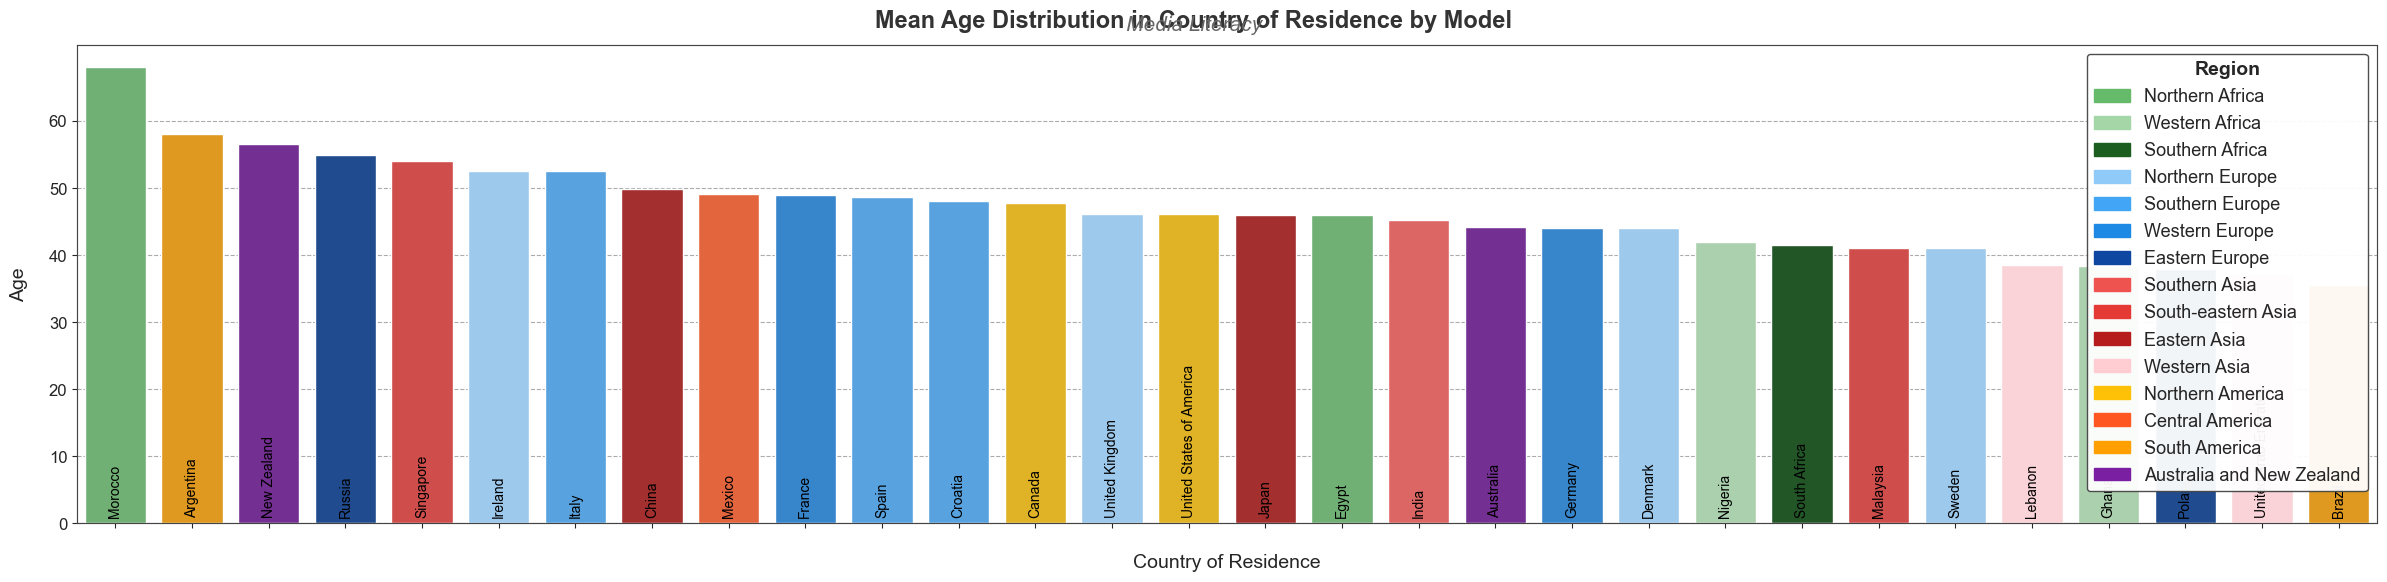

In [8]:
models=['ChatGPT','Claude','DeepSeek','Gemini']
countryHelper = CountryHelper()

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.country2short)
df['Country of Residence'] = df['Country of Residence'].apply(countryHelper.fix_country_naming)
df['Country of Origin'] = df['Race'].apply(countryHelper.race2country)

df_2 = countryHelper.get_country_average_y(df,x='Country of Residence',y='Age')
df_2['Continent'] = df_2['Country of Residence'].apply(lambda x: countryHelper.country2region(x)['region'])
df_2['Region'] = df_2['Country of Residence'].apply(lambda x: countryHelper.country2region(x)['subregion'])
plt = histogram.draw(
    df=df_2,x='Country of Residence', y='Age',
    hue='Region', ylim=60, ystep=10,
    dataset=dataset, aggregate=True,
    long_layout=True, legend=(1,1),
    xtick_label_max_len=30, title_size=17,
    figsize=(9,9)
)

plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age and Country of Residence (Histogram) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Employment by Subsector

c:\Users\Owner\Desktop\gender\draw.py:548: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


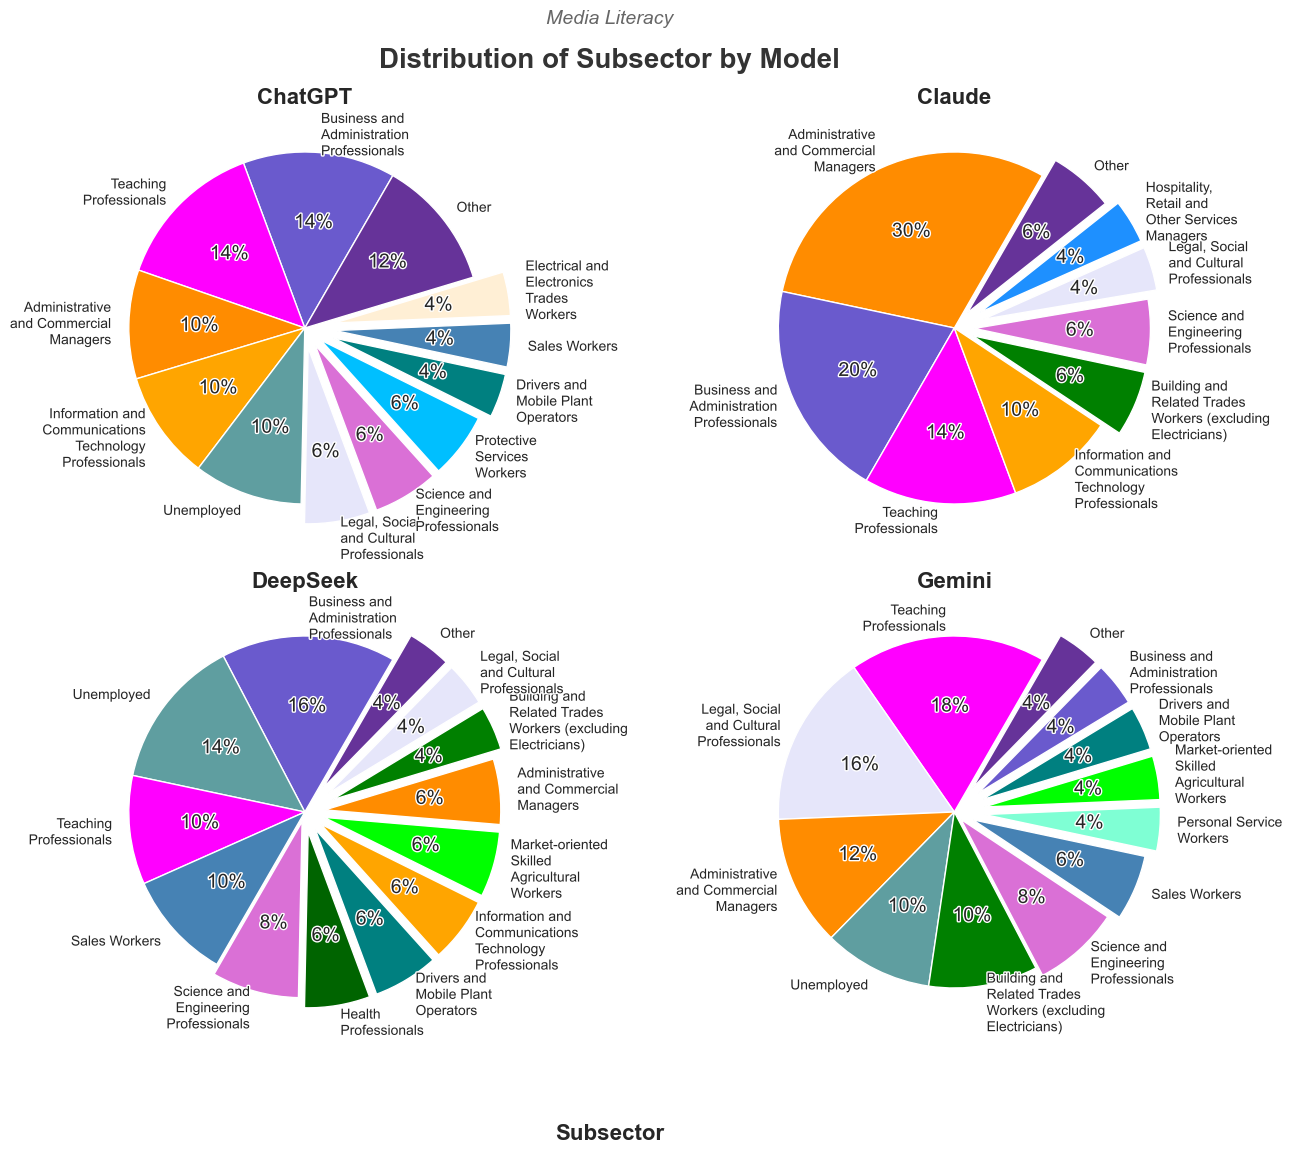

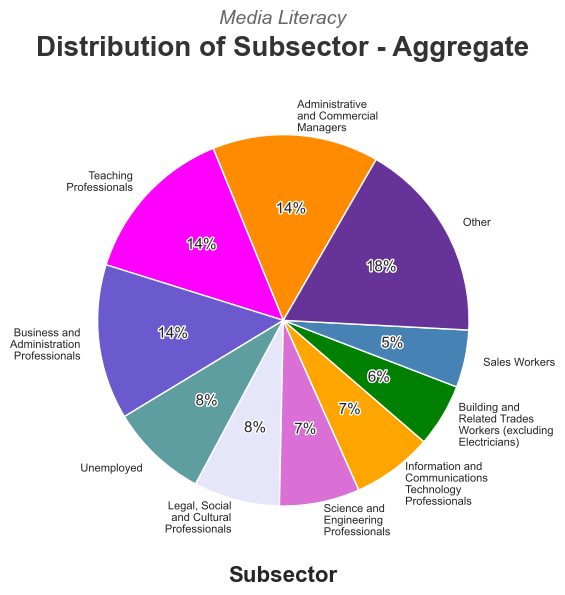

In [9]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
dataset = "Media Literacy"
piechart = Piechart(models)

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

plt = piechart.draw(
    df,x="Subsector",
    dataset=dataset,
    aggregate=False, other=0.04,
    text_width=15, rotation=60, space=0.1,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Subsector (Piechart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = piechart.draw(
    df,x="Subsector",
    dataset=dataset,
    aggregate=True, other=0.04,
    text_width=15, rotation=60,
    figsize=(6,6),
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Subsector (Piechart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

c:\Users\Owner\Desktop\gender\draw.py:311: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


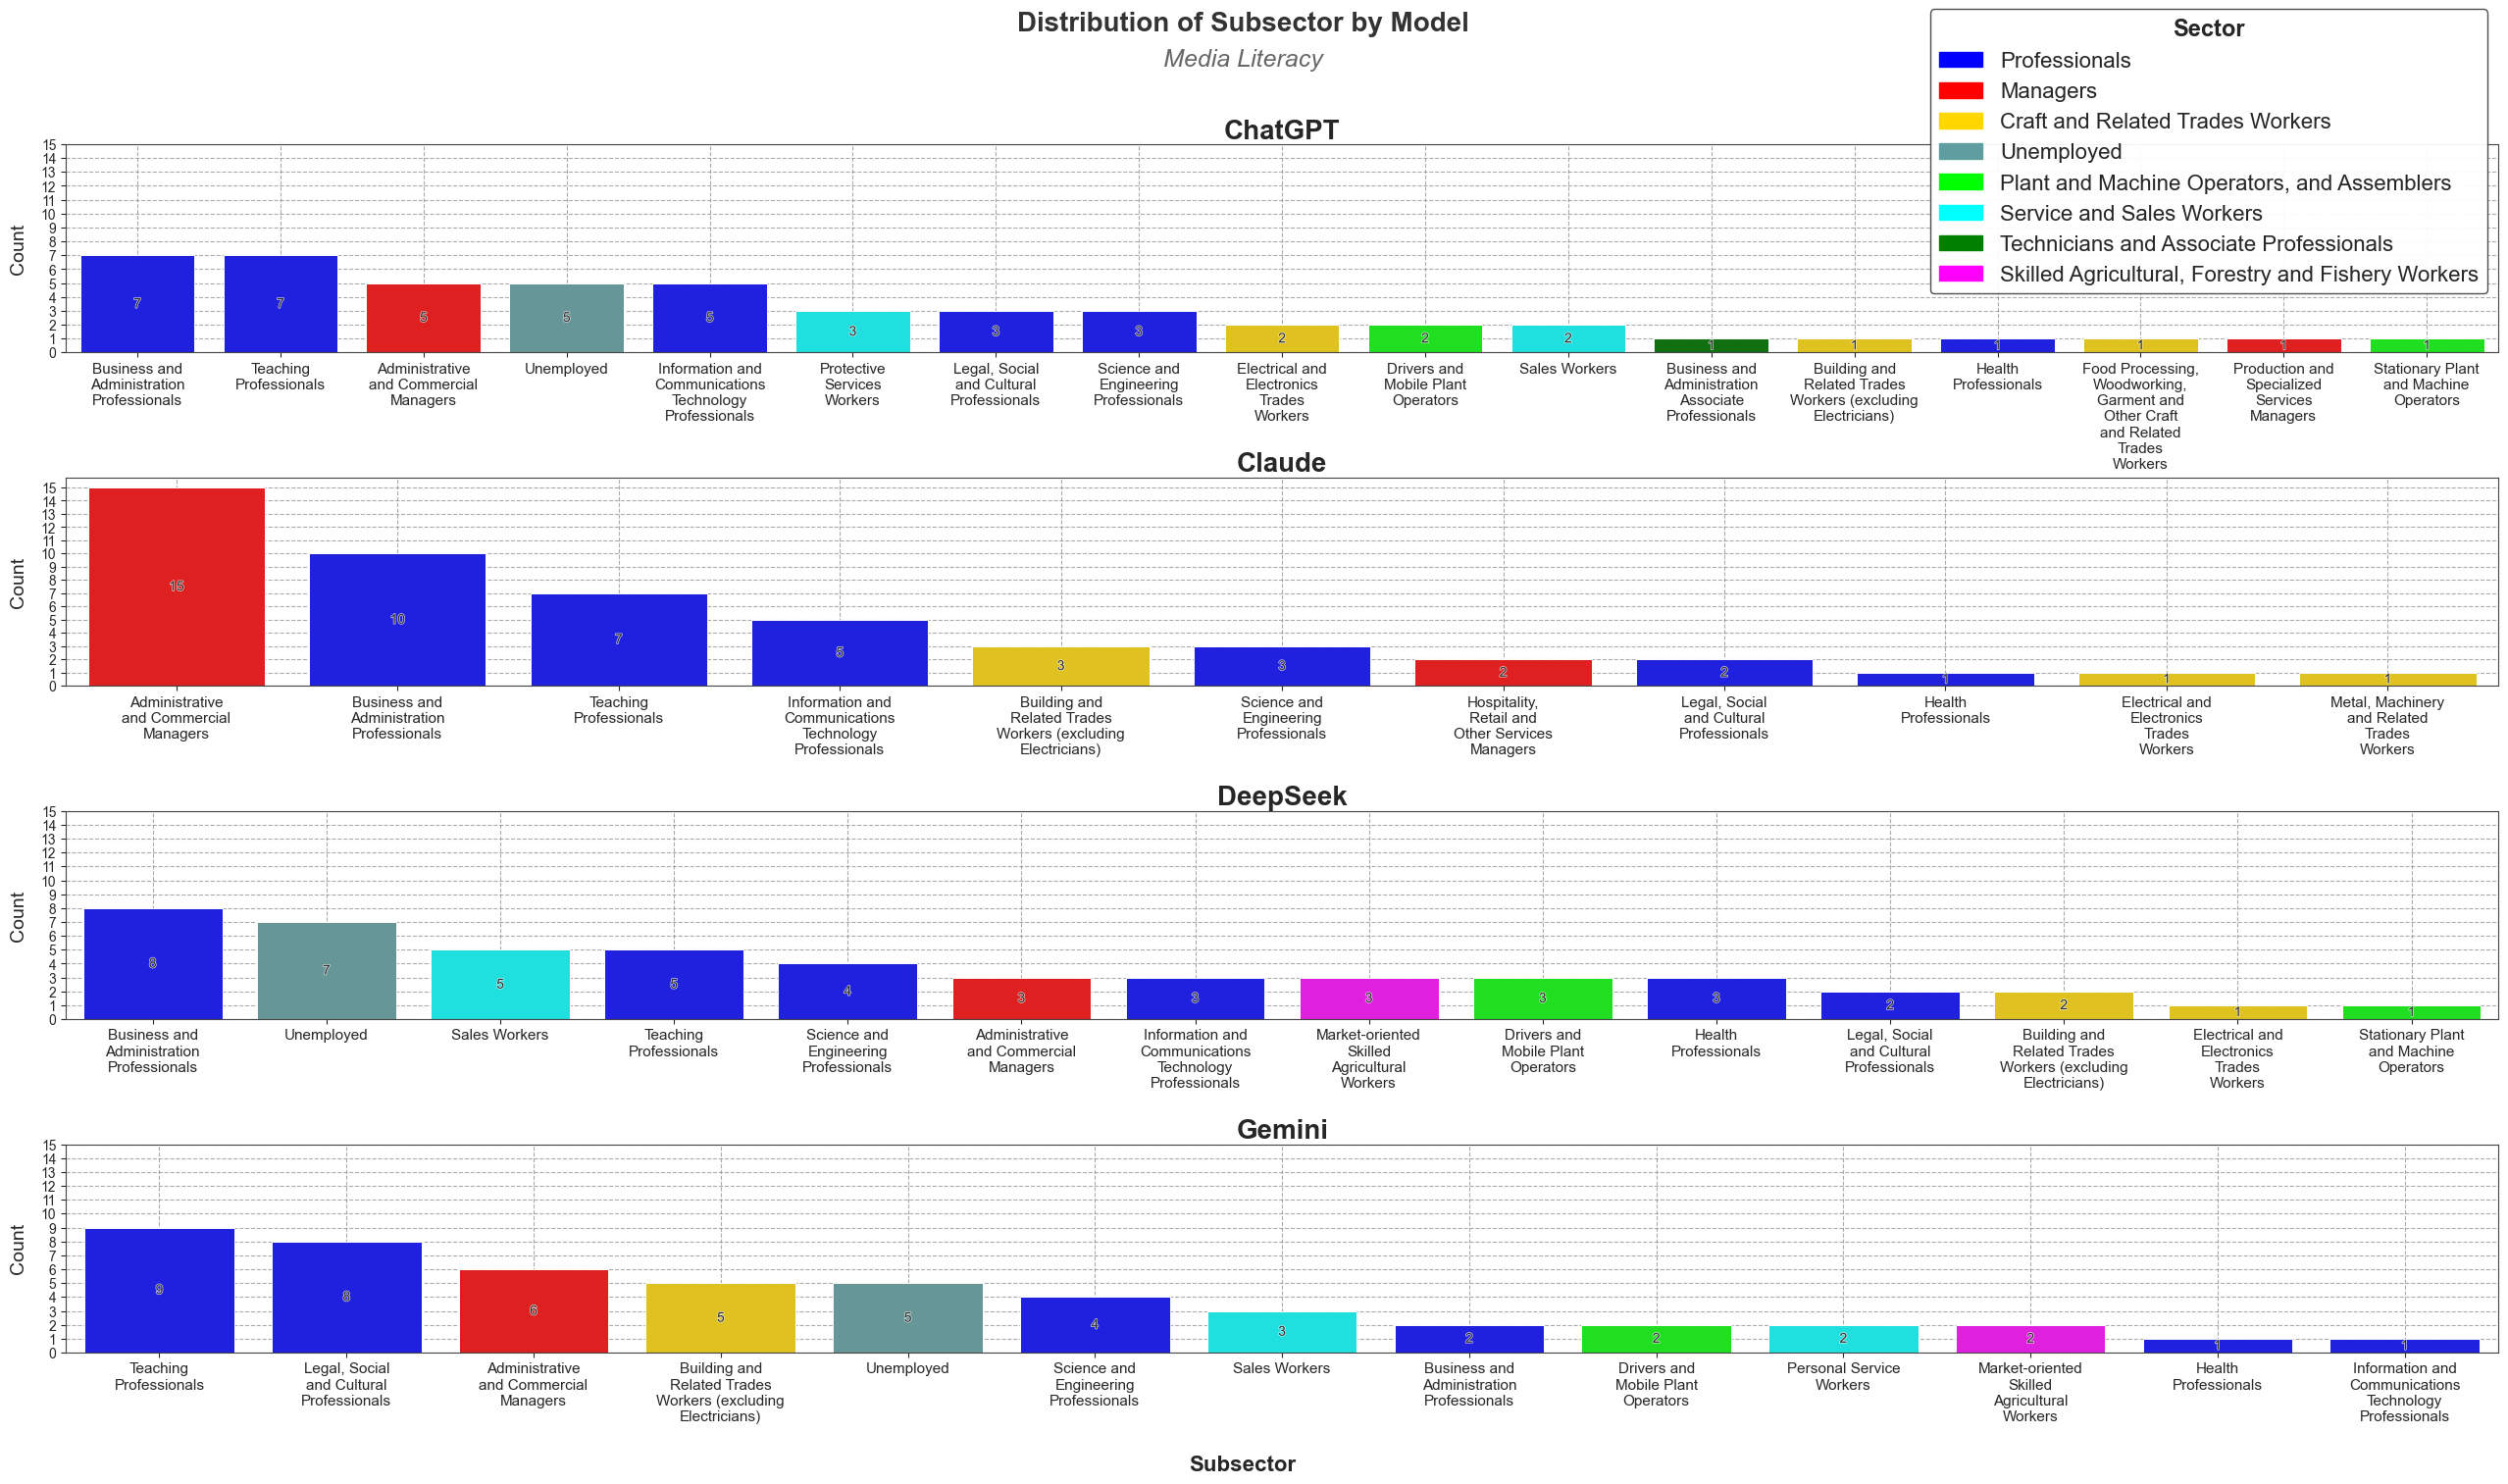

In [10]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)
dataset = "Media Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

histogram = Histogram(models)
plt = histogram.draw(
    df,x='Subsector', hue='Sector',
    dataset=dataset,legend=(1,1.7),
    aggregate=False,long_layout=True,
    rotation=0, text_width=15, bar_labels=True,
    hspace=0.6,figsize=(32,16),
    title_size=20, grid=True
    # xtick_label_max_len=25
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Subsector (Histogram)"), dpi=300, bbox_inches='tight')
plt.show()

### Employment by Sector

c:\Users\Owner\Desktop\gender\draw.py:548: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


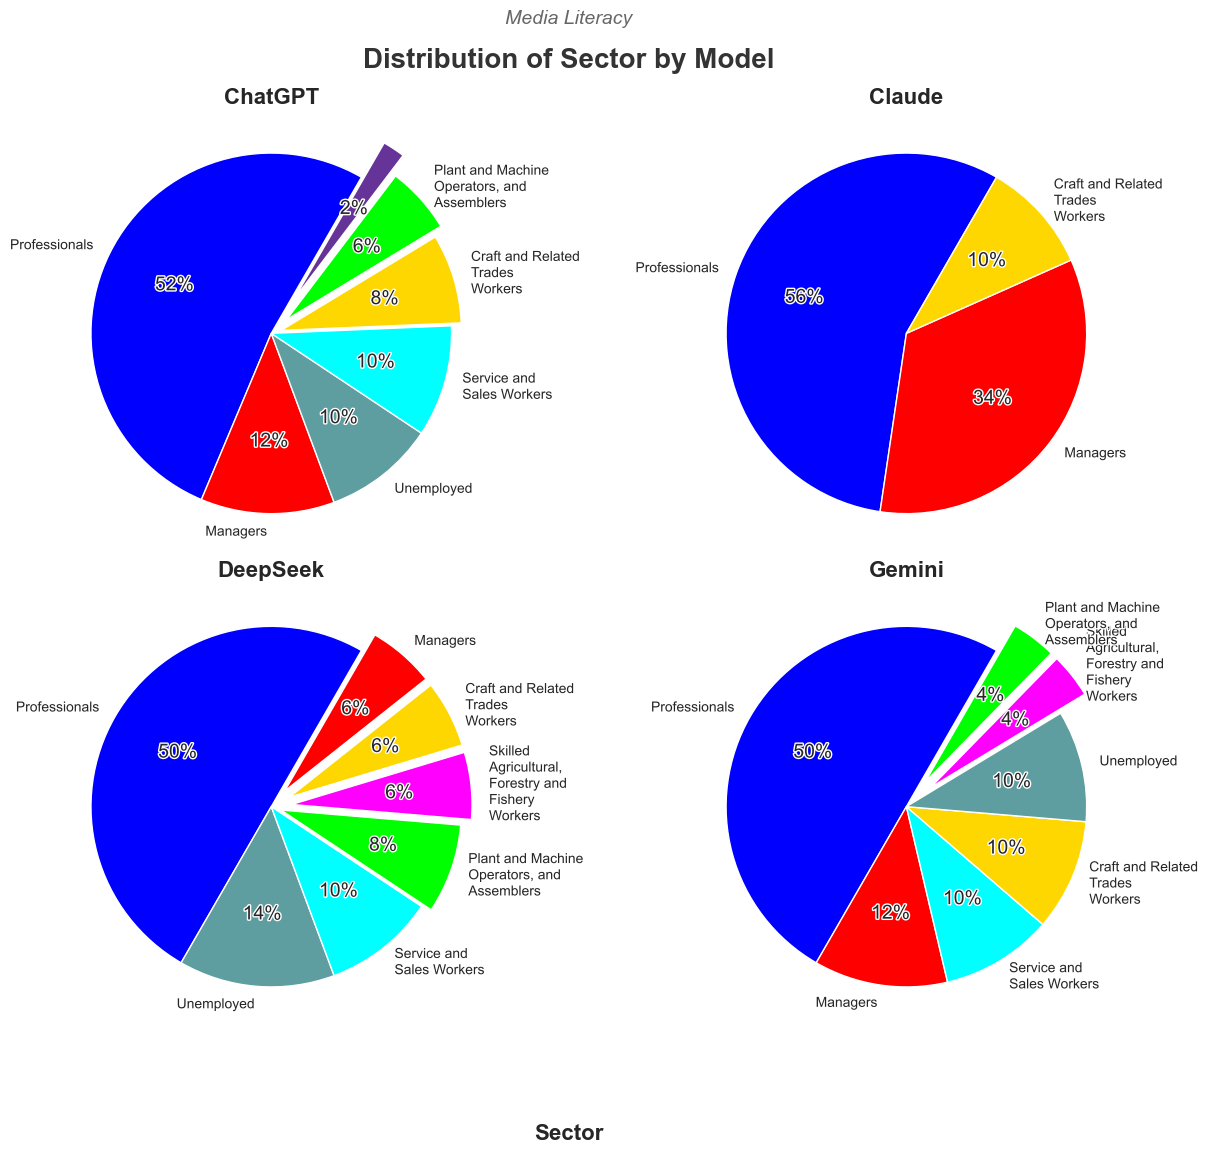

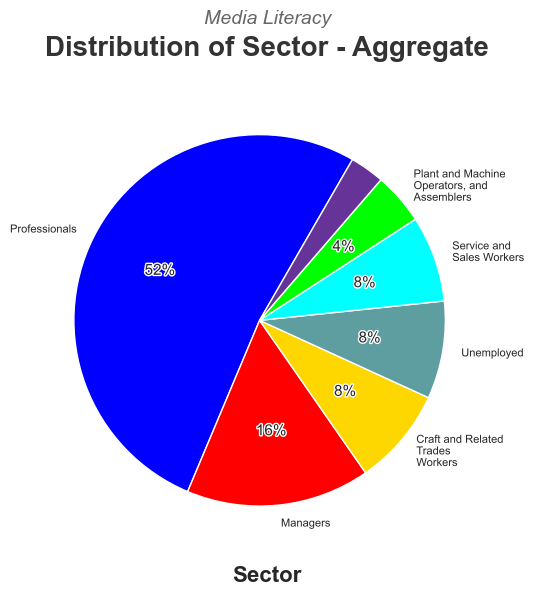

In [11]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)
dataset = "Media Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(lambda job: jobHelper.employment2sector(job))
df['Subsector'] = df['Employment'].apply(lambda job: jobHelper.employment2subsector(job))

plt = piechart.draw(
    df,x="Sector",
    dataset=dataset,
    aggregate=False, other=0.04, space=0.05,
    text_width=15, rotation=60
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Sector (Piechart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = piechart.draw(
    df,x="Sector", figsize=(6,6),
    dataset=dataset,
    aggregate=True, other=0.04,
    space=0.05, text_width=15, rotation=60,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Employment by Sector (Piechart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age, Education, Gender (BarChart)

high school diploma secondary education high school diploma secondary education doctorate high school high school high school high school high school diploma associate high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school graduate high school diploma high school diploma high school diploma high school diploma high school graduate high school diploma high school diploma middle school high school diploma high school diploma high school diploma primary education high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma high school diploma secondary school a-levels primary school middle school ged high school high school diploma high school diploma elementary school high school high school secon

c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gende

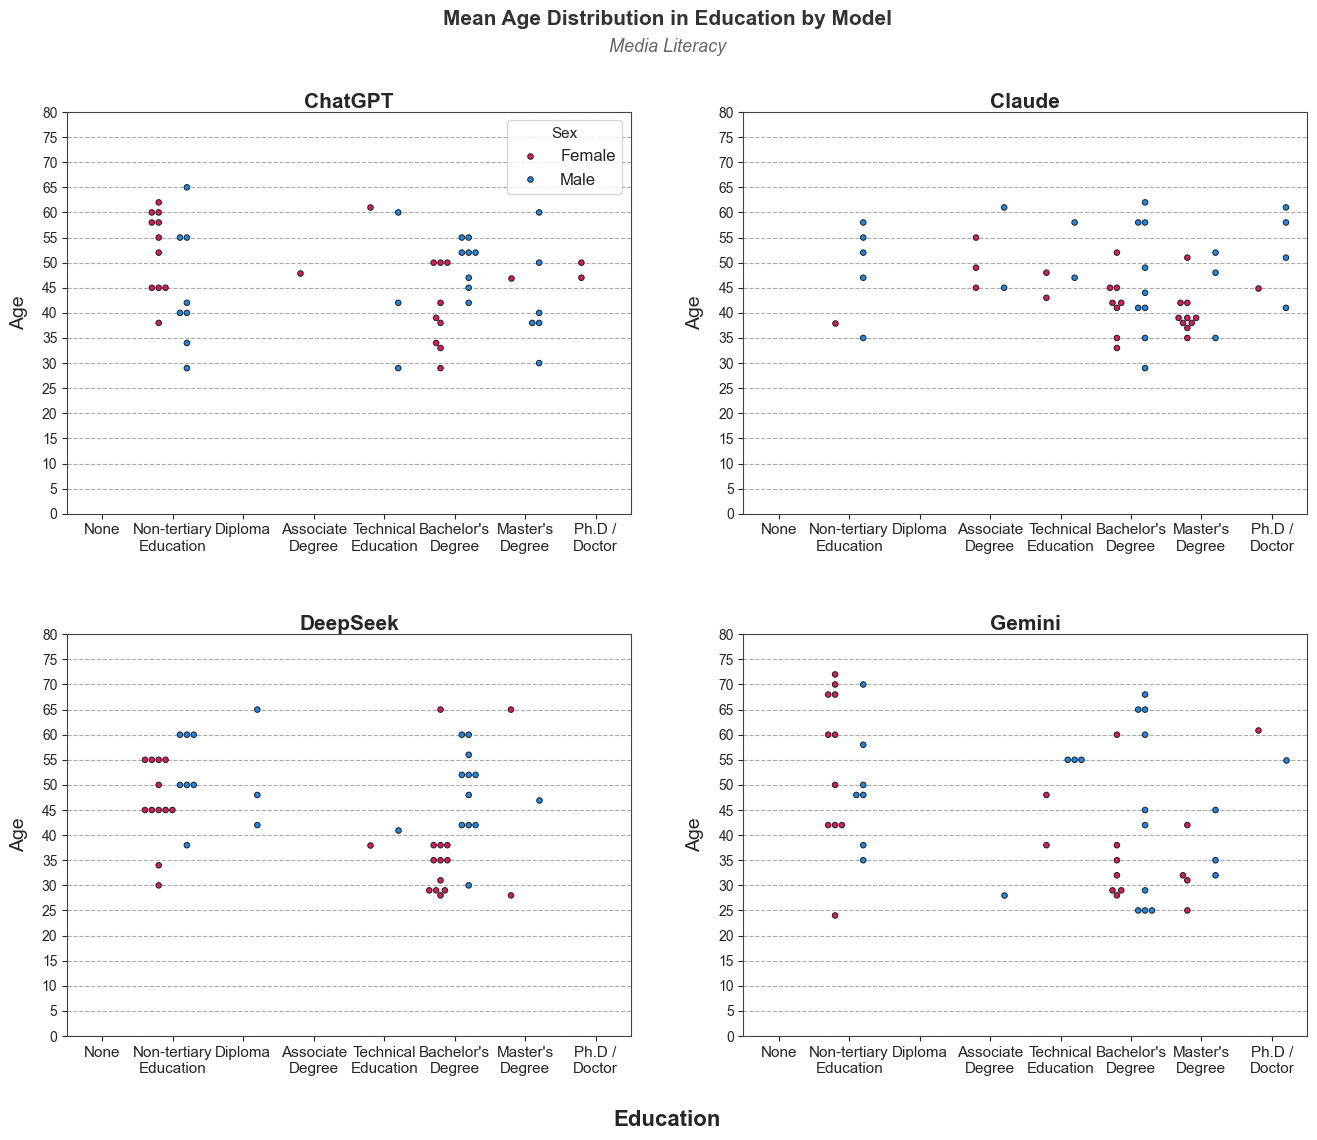

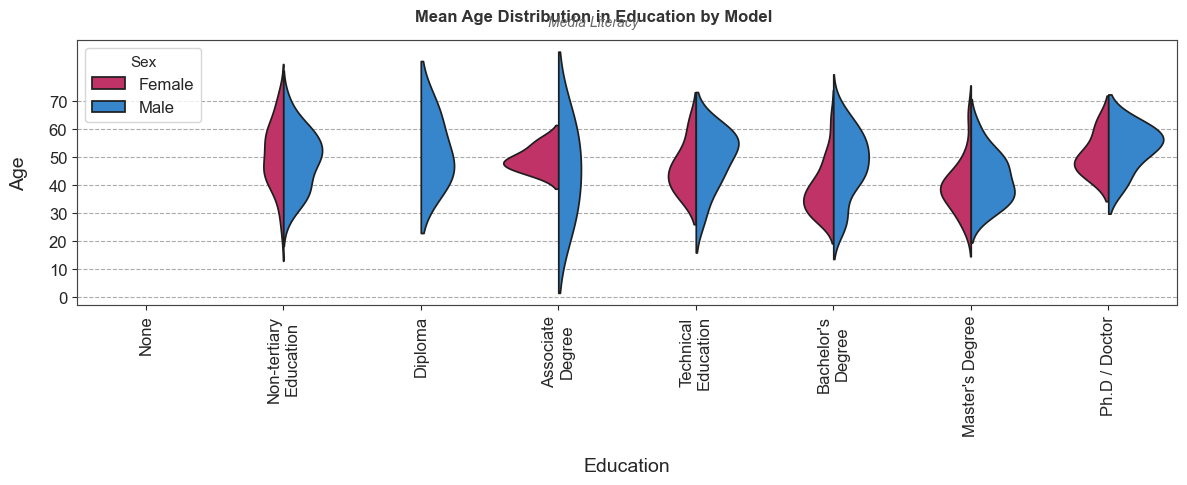

In [12]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Education'] = df['Education'].apply(jobHelper.education2certification)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = histogram.draw(
    df=df,x='Education',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=False, text_width=12,
    rotation=0, ylim=80, ystep=5, violin=False,swarm=True,
    figsize=(16,12), grid=True, title_size=15
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Education Gender (BarChart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = histogram.draw(
    df=df,x='Education',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=True, text_width=15,
    rotation=90, ylim=70, ystep=10, violin=True,swarm=False,
    figsize=(12,5), grid=True, 
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Education Gender (BarChart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Age, Employment, Gender (BarChart)

c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gender\draw.py:296: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.xaxis.grid(not swarm, linestyle='--', alpha=0.7 if not swarm else 0, color='#888888')
c:\Users\Owner\Desktop\gende

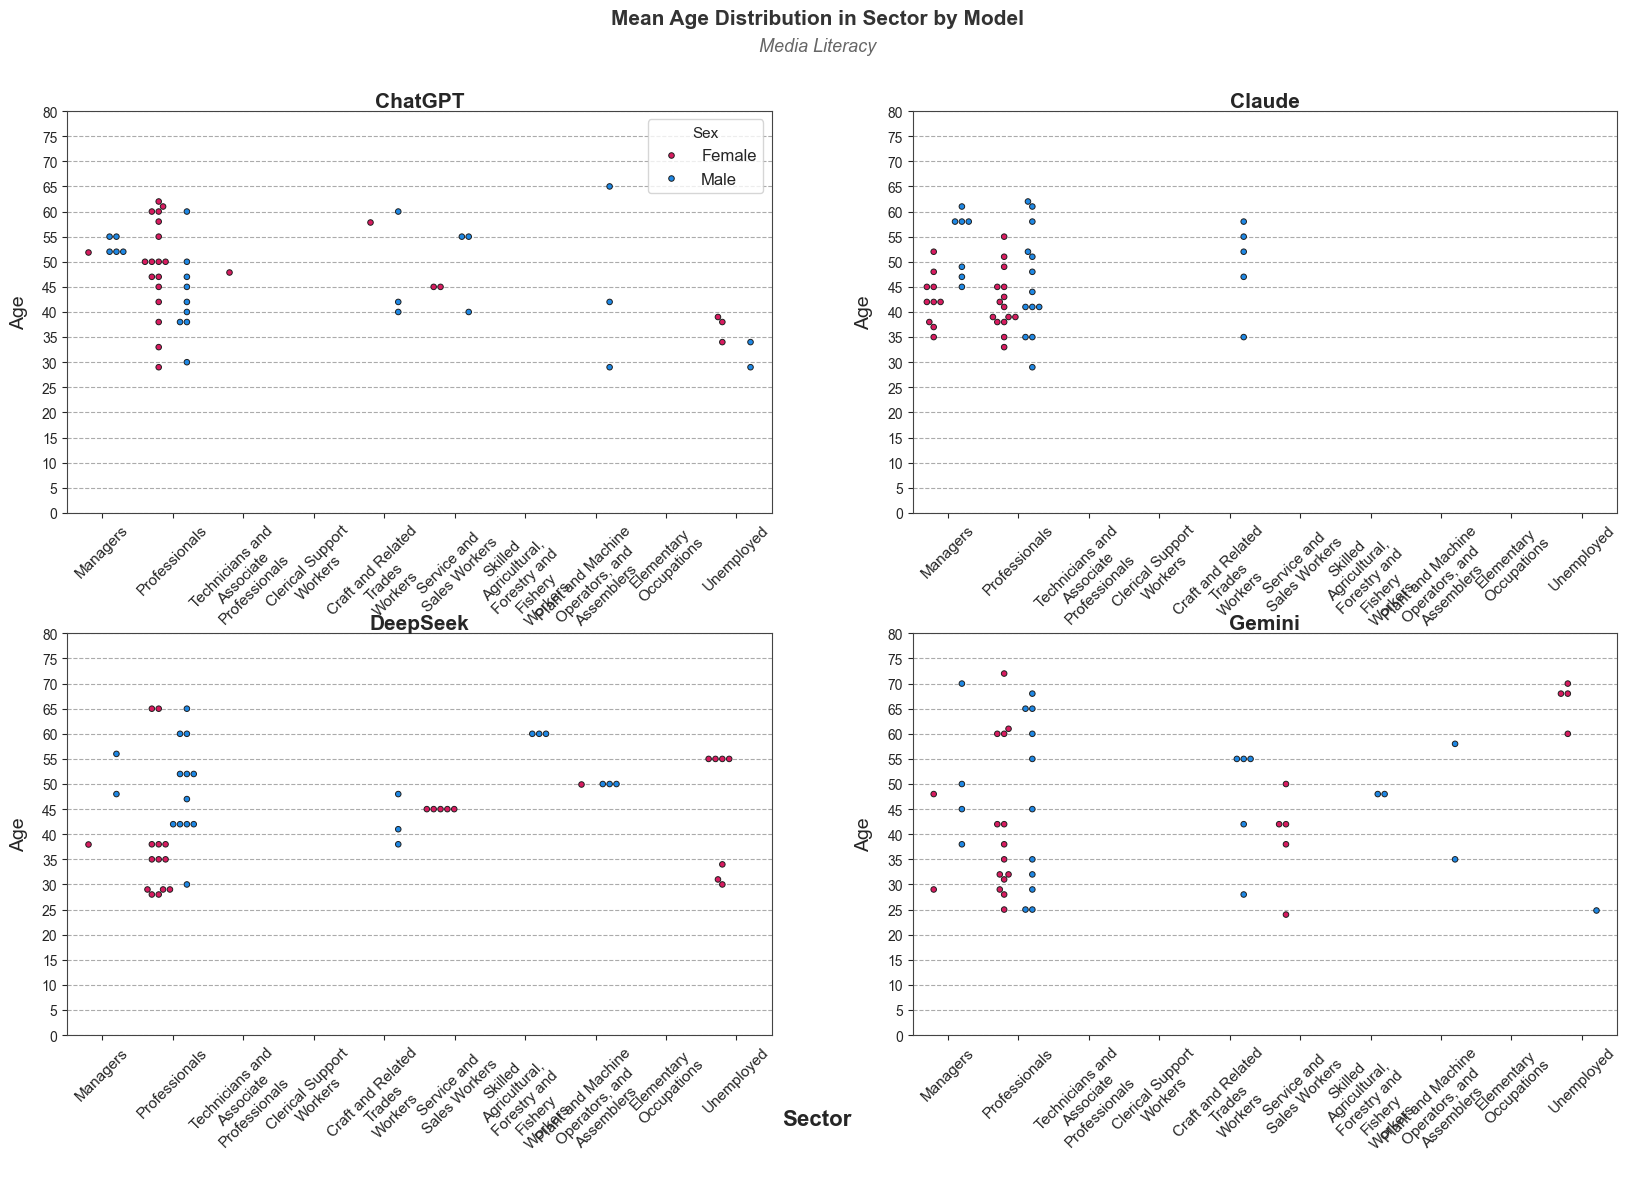

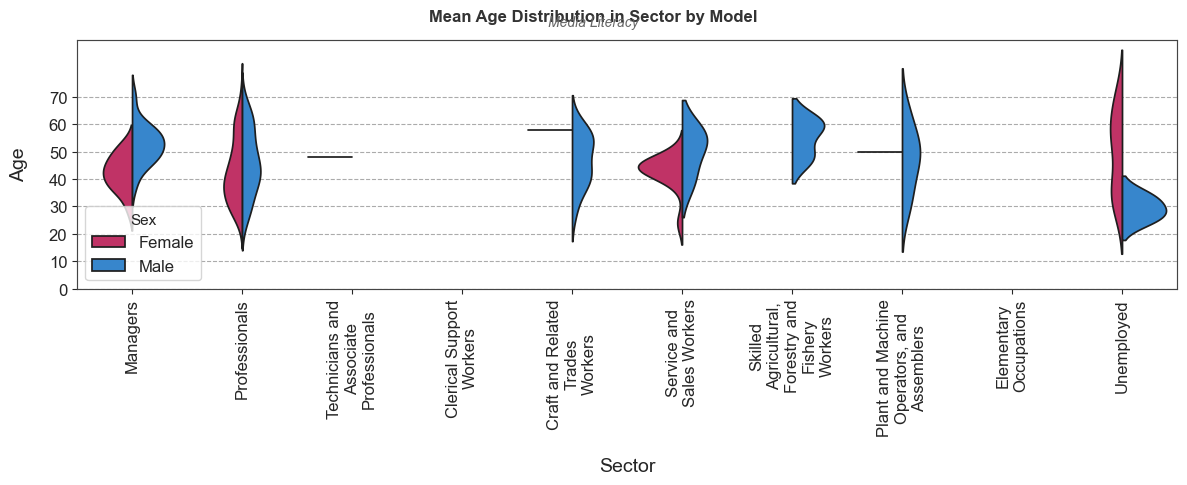

In [13]:
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector']    = df['Employment'].apply(jobHelper.employment2sector)   
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = histogram.draw(
    df=df,x='Sector',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=False, text_width=15,
    rotation=45, ylim=80, ystep=5, violin=False,swarm=True,
    figsize=(20,12), grid=True, title_size=15,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Employment Gender (BarChart)"), dpi=300, bbox_inches='tight')
plt.show()

plt = histogram.draw(
    df=df,x='Sector',
    hue='Sex',y='Age',
    dataset=dataset,
    aggregate=True, text_width=15,
    rotation=90, ylim=70, ystep=10, violin=True,swarm=False,
    figsize=(12,5), grid=True, 
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Age Employment Gender (BarChart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

### Gender (Piechart)

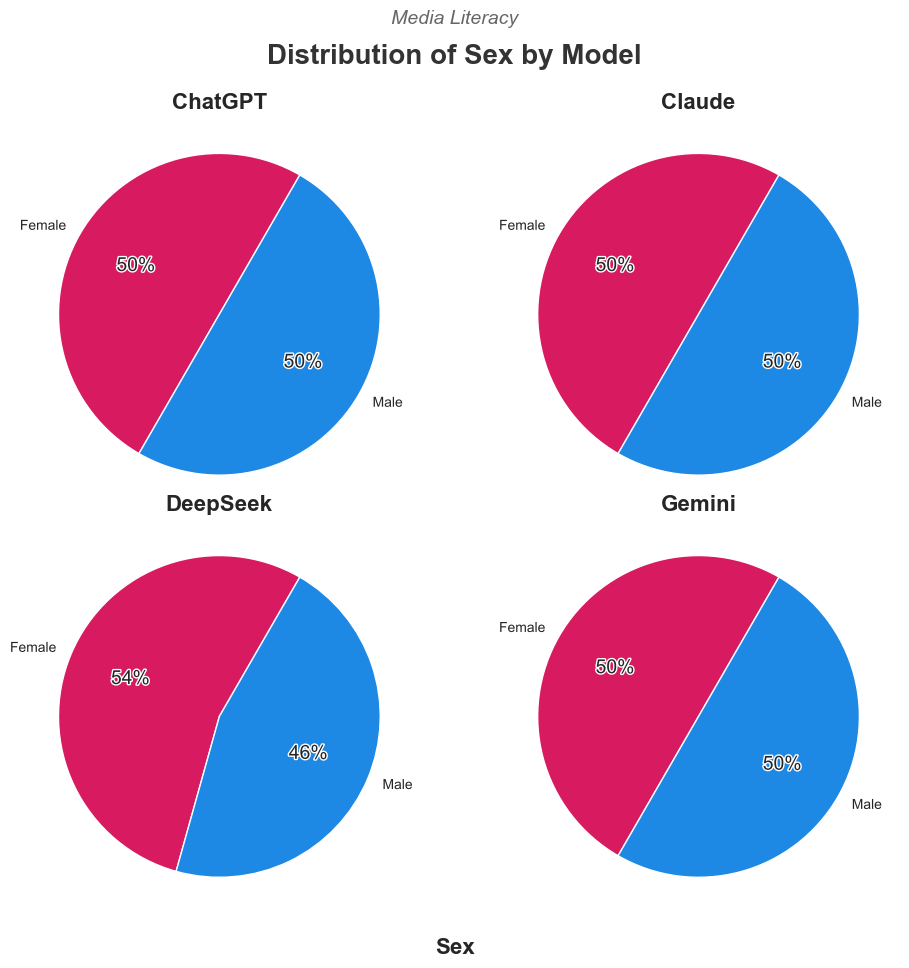

In [14]:
import os
import pandas as pd
from draw import Histogram, Piechart, Map
from helper import CountryHelper,JobHelper, SexHelper

models = ["ChatGPT","Claude","DeepSeek","Gemini"]
case_studies = ["Career Development","Family Health","Financial Literacy","Media Literacy"]
piechart = Piechart(models)
dataset = "Media Literacy"

dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

#Make piechart function for each gender's employment/education
jobHelper = JobHelper()
sexHelper = SexHelper()

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = piechart.draw(
    df, x="Sex",
    dataset=dataset,
    aggregate=False, other=0.04,
    text_width=15, rotation=60,
    figsize=(10,10),space=0,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender (Piechart)"), dpi=300, bbox_inches='tight')
plt.show()

### Gender and order of responses (Stacked Bar Chart)

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


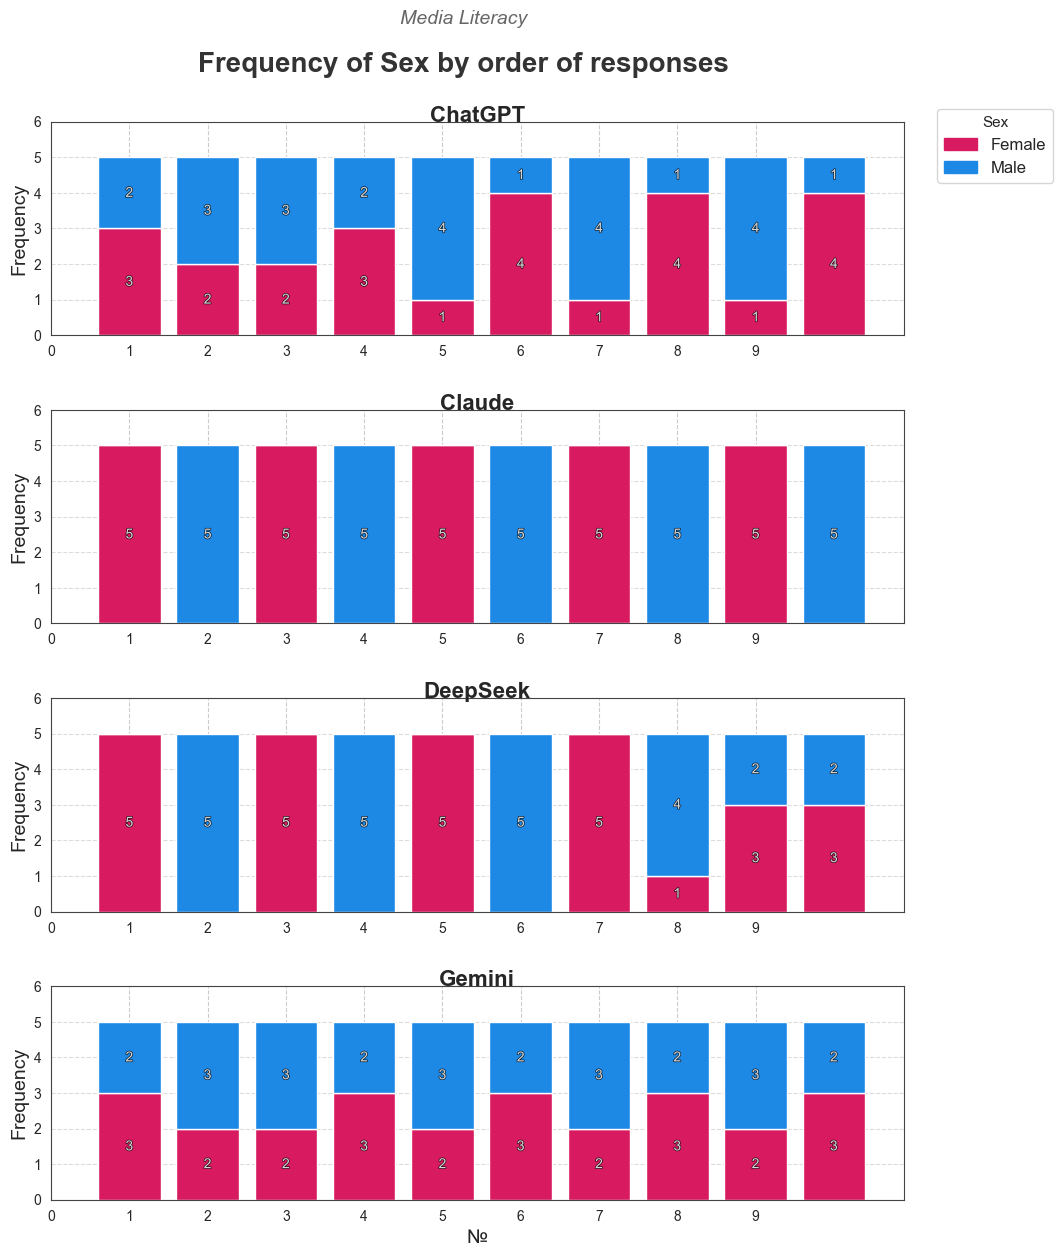

In [15]:
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector'] = df['Employment'].apply(jobHelper.employment2sector)
df['Subsector'] = df['Employment'].apply(jobHelper.employment2subsector)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)


plt = stackedBar.draw(
    df=df,x='№',stacked_hue='Sex',
    space=0.35, ylim=6, bar_labels=True,
    figsize=(11,14), grid=True,dataset=dataset
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and order of responses (Stacked Bar Chart)"), dpi=300, bbox_inches='tight')
plt.show()

### Gender and Employment (Stacked Bar Chart)

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


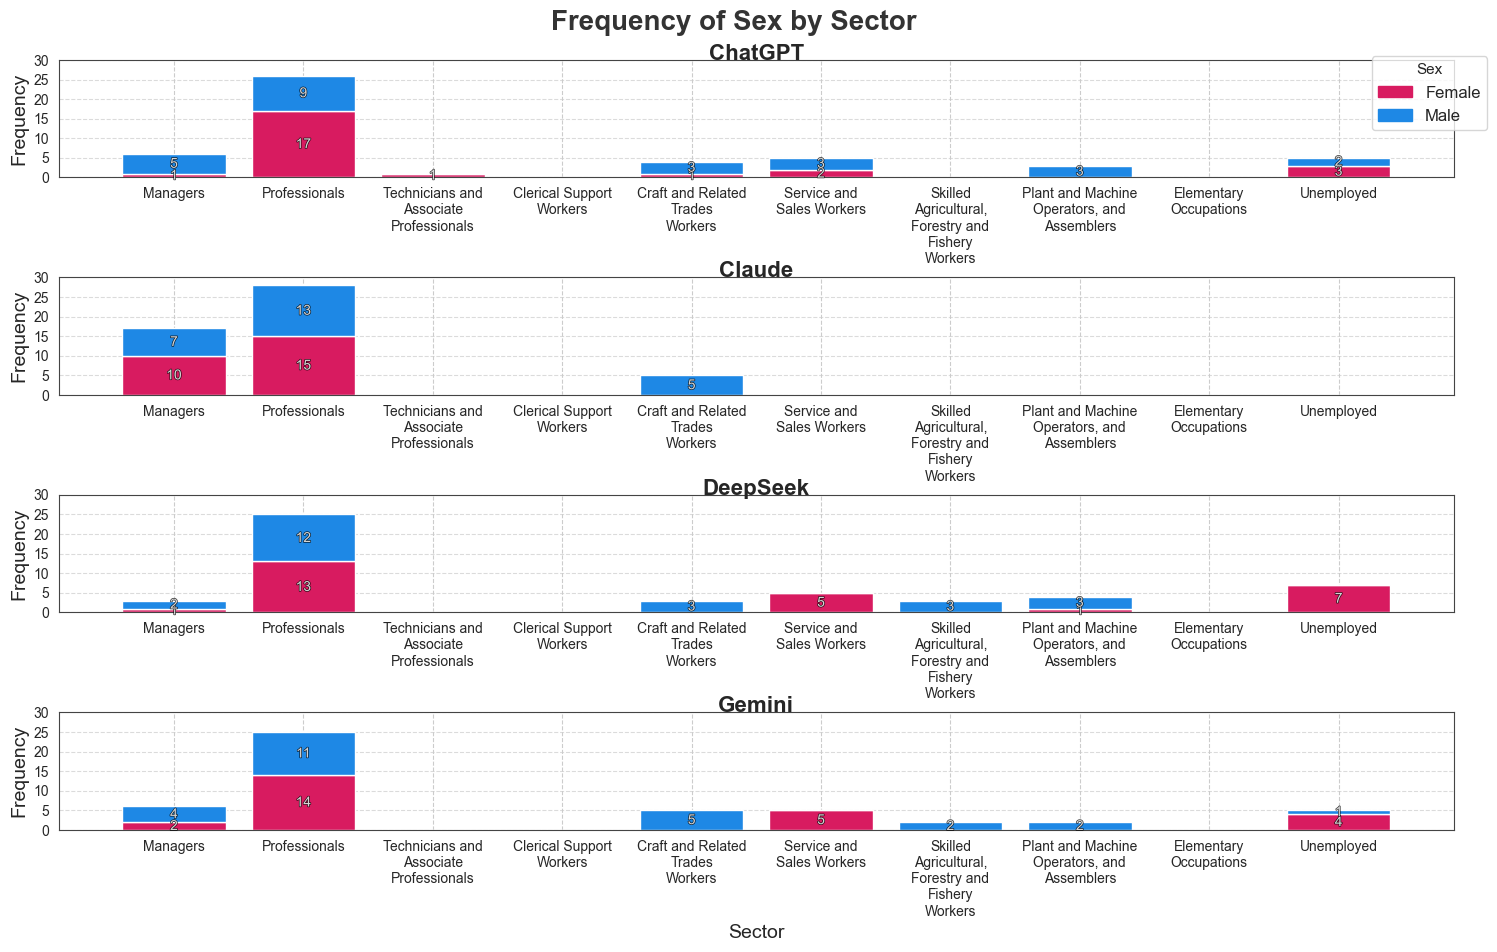

c:\Users\Owner\Desktop\gender\draw.py:859: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.04, 1, 0.94])


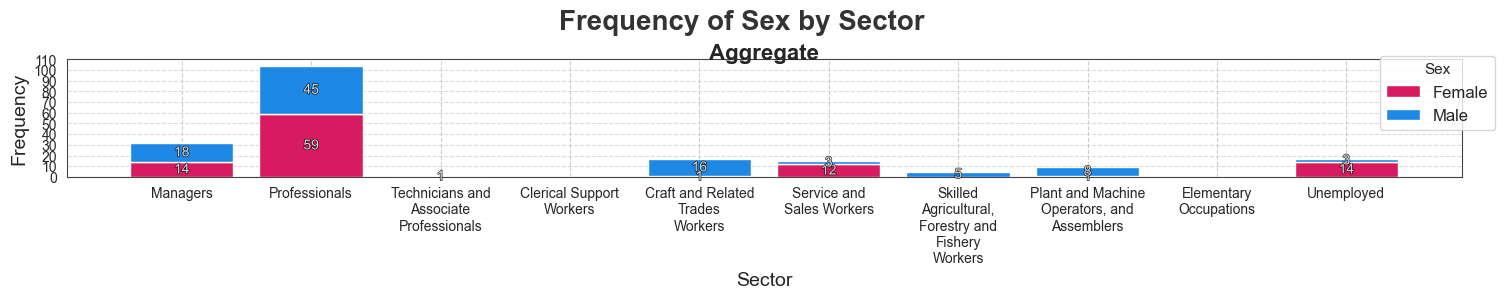

In [16]:
from draw import squeeze_text
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}

df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sector']    = df['Employment'].apply(jobHelper.employment2sector)   
df['Subsector'] = df['Employment'].apply(jobHelper.employment2subsector)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)

plt = stackedBar.draw(
    df=df,x='Sector',stacked_hue='Sex', grid=True,
    space=0.85, ylim=30, ystep=5,bar_labels=True,
    txt_width=15, figsize=(18,10),
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Employment (Stacked Bar Chart)"), dpi=300, bbox_inches='tight')
plt.show()


plt = stackedBar.draw(
    df=df,x='Sector',stacked_hue='Sex', grid=True, 
    space=0.85, ylim=110, ystep=10, bar_labels=True,
    txt_width=15, figsize=(18,10), aggregate=True,
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Employment (Stacked Bar Chart) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()


### Gender and Age (Population Pyramid)

c:\Users\Owner\Desktop\gender\draw.py:572: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([stacked_hue, x,hue]).size().reset_index(name='count')
c:\Users\Owner\Desktop\gender\draw.py:610: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(x)[y].sum().reindex(xlabels, fill_value=0)
c:\Users\Owner\Desktop\gender\draw.py:612: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(x)[y].sum().reindex(xlabe

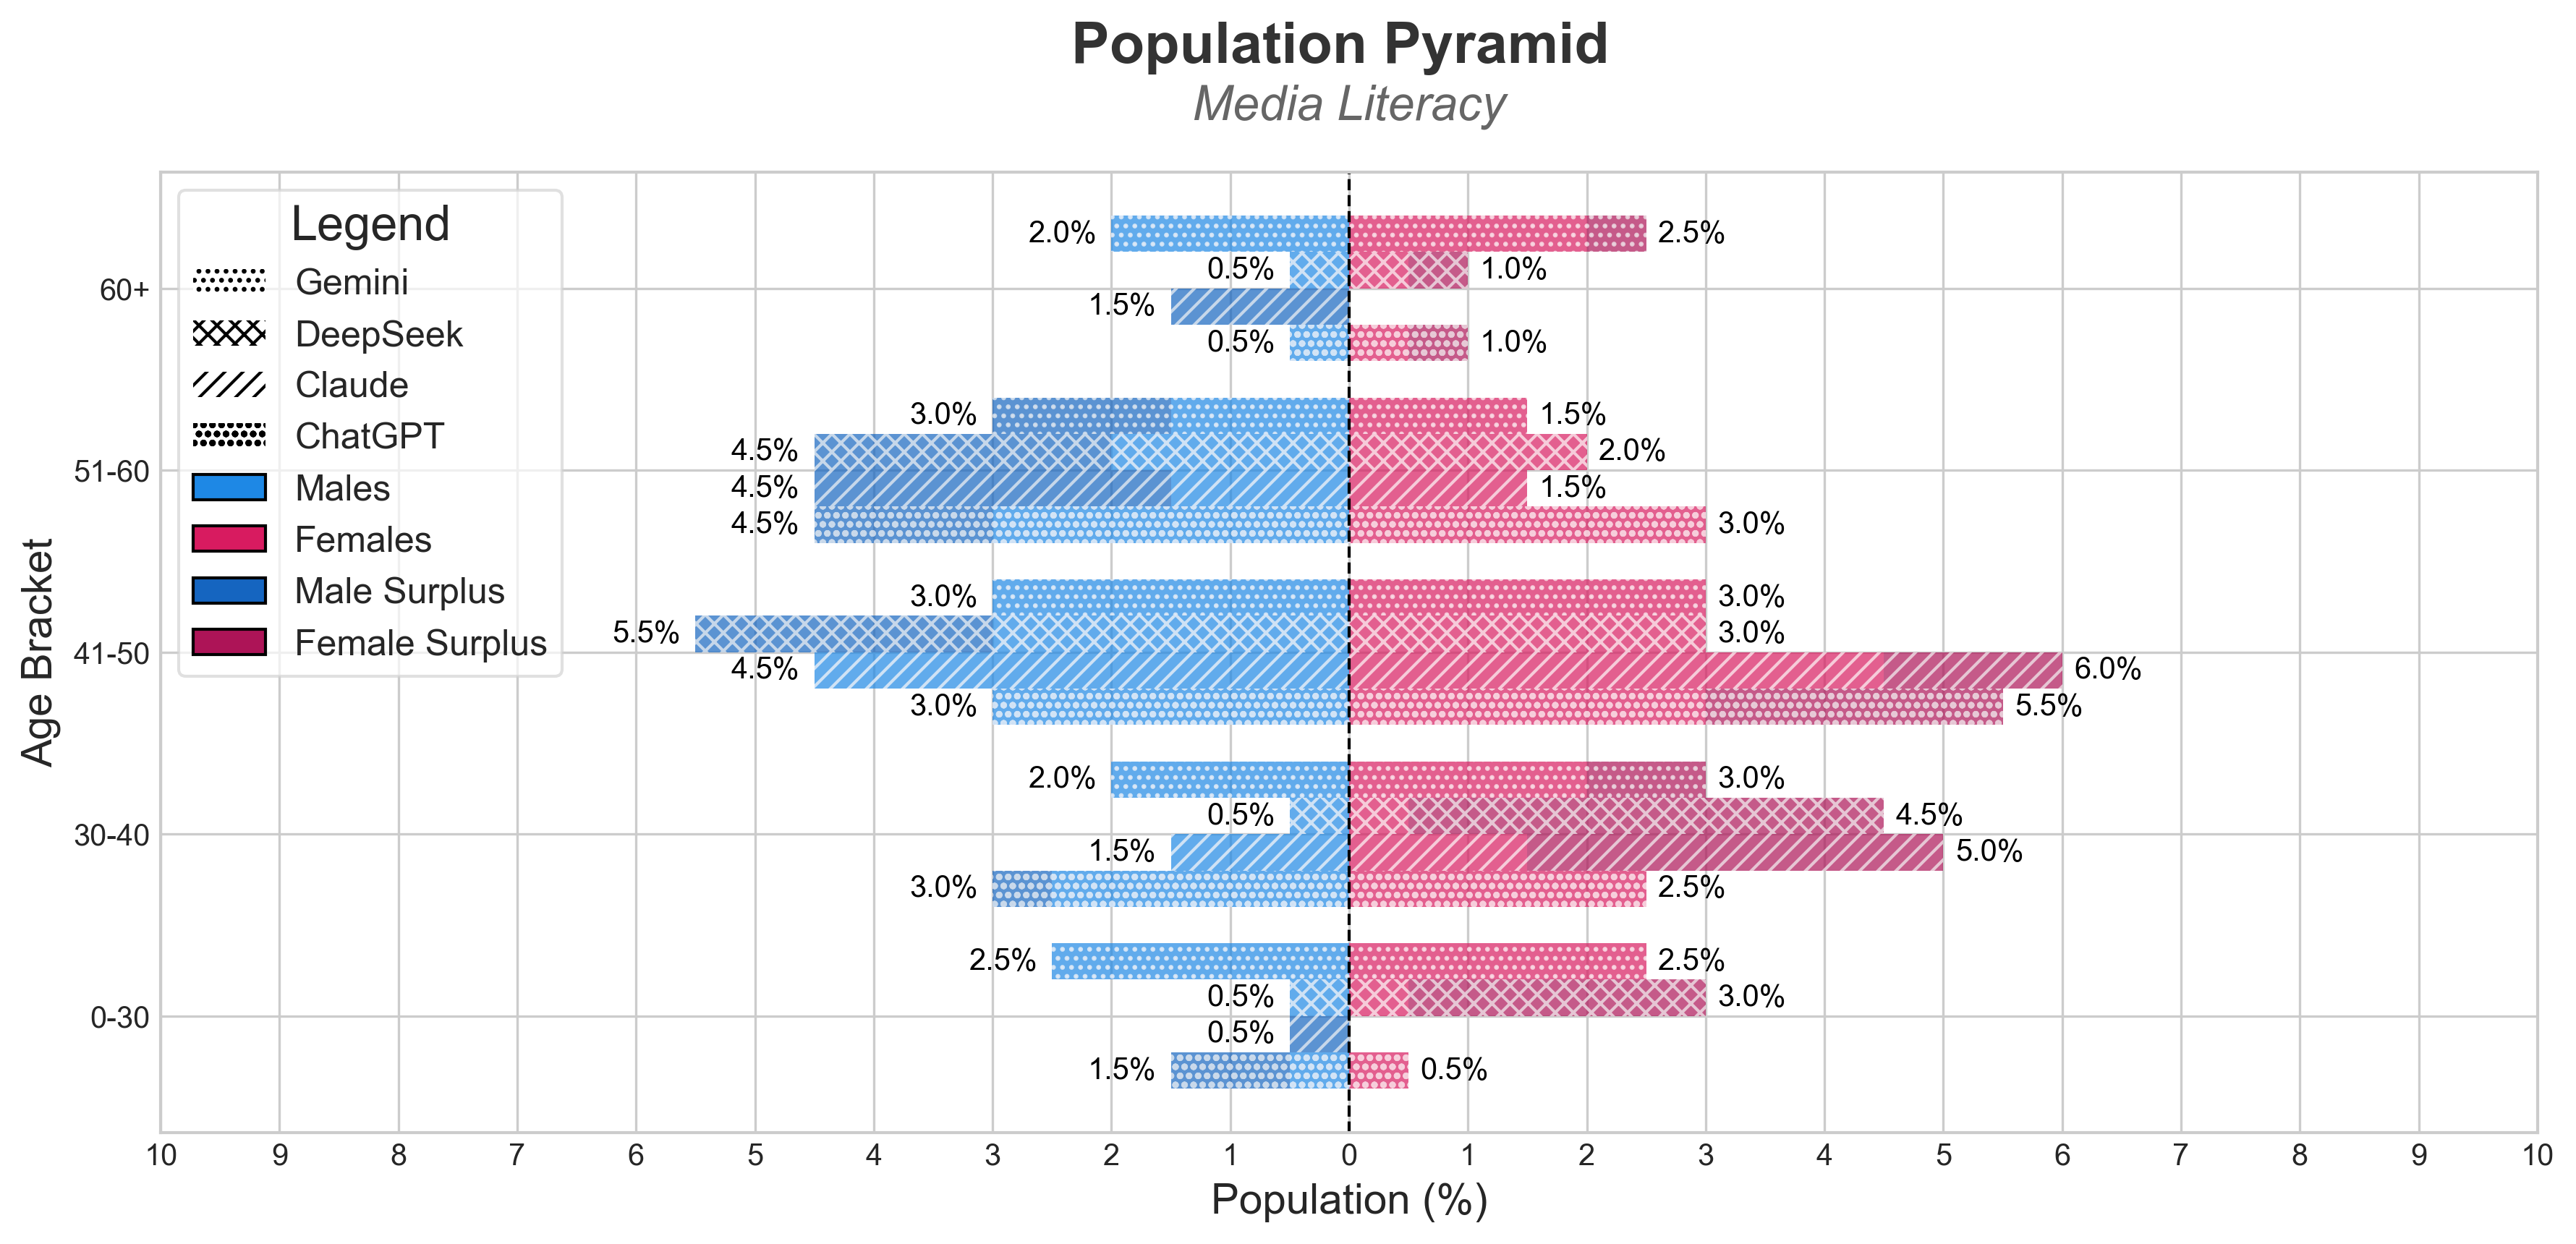

c:\Users\Owner\Desktop\gender\draw.py:572: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby([stacked_hue, x,hue]).size().reset_index(name='count')
c:\Users\Owner\Desktop\gender\draw.py:579: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  males   = df[df[stacked_hue] == 'Male'  ].groupby(x)[y].sum().reindex(xlabels, fill_value=0)
c:\Users\Owner\Desktop\gender\draw.py:580: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warn

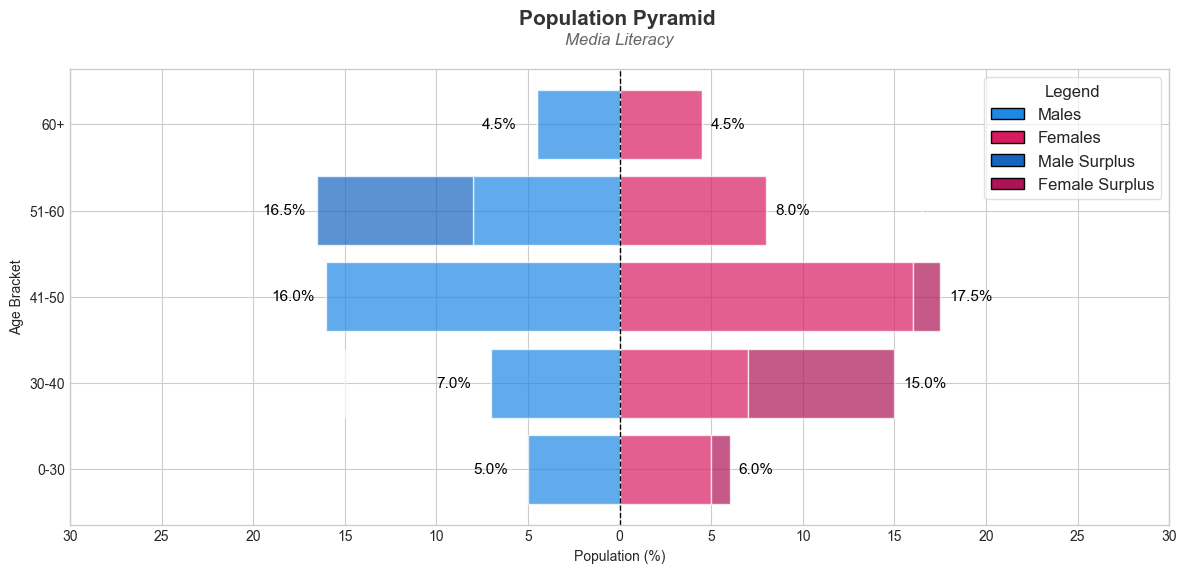

In [17]:
dfs = {
    case_study: {
        model:pd.read_csv(os.path.join("Case Studies",case_study,f'{model}.csv'))
        for model in models
    }
    for case_study in case_studies
}
df = pd.concat([dfs[dataset][model].assign(model=model) for model in models], ignore_index=True)
df['Sex'] = df['Sex'].apply(sexHelper.sex2standard)


xlabels = ['0-30', '30-40', '41-50', '51-60', '60+']
df['Age Bracket'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=xlabels)

from draw import PopulationPyramid
pPyramid = PopulationPyramid(models=models)

plt = pPyramid.draw(
    df=df,x='Age Bracket',stacked_hue='Sex',dataset=dataset,
    xlabels=xlabels,aggregate=False, fontsize=14, figsize=(12,6)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Age (Population Pyramid)"), dpi=300, bbox_inches='tight')
plt.show()

plt = pPyramid.draw(
    df=df,x='Age Bracket',stacked_hue='Sex',dataset=dataset,
    xlabels=xlabels,aggregate=True, xlim=30, xstep=5, figsize=(12,6)
)
plt.savefig(os.path.join('Case Studies',dataset,'data',f"Gender and Age (Population Pyramid) - Aggregate"), dpi=300, bbox_inches='tight')
plt.show()

